In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


# NFT pools analysis (AXS/WETH, MANA/WETH, ENJ/WETH, SAND/WETH, ALICE/WETH)

This section will contain analysis of attacks on NFT pools or NFT-related pools

In [2]:
# NFT token pools or NFT-related token pools
axs_weth_sim = Simulation(experiment_id = 11, x_name = 'AXS', y_name = 'WETH', window_size = 24,
                          base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
mana_weth_sim = Simulation(experiment_id = 12, x_name = 'MANA', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
enj_weth_sim = Simulation(experiment_id = 13, x_name = 'ENJ', y_name = 'WETH', window_size = 24,
                          base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_", x_index = '1', y_index = '0')
sand_weth_sim = Simulation(experiment_id = 14, x_name = 'SAND', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
alice_weth_sim = Simulation(experiment_id = 15, x_name = 'ALICE', y_name = 'WETH', window_size = 24,
                            base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

In [3]:
axs_weth_swaps_df = axs_weth_sim.get_original_swaps_df()
mana_weth_swaps_df = mana_weth_sim.get_original_swaps_df()
enj_weth_swaps_df = enj_weth_sim.get_original_swaps_df()
sand_weth_swaps_df = sand_weth_sim.get_original_swaps_df()
alice_weth_swaps_df = alice_weth_sim.get_original_swaps_df()

In [4]:
nft_pools_list = [axs_weth_swaps_df, mana_weth_swaps_df, enj_weth_swaps_df,
                  sand_weth_swaps_df, alice_weth_swaps_df]
nft_pools_swaps_df = pd.concat(nft_pools_list)
nft_possible_mevs_df = pd.read_pickle('nft_pools_possible_mevs_with_gas_df.pkl')

In [5]:
nft_possible_mevs_df = pd.merge(nft_possible_mevs_df, nft_pools_swaps_df, on='txd', how='left')

In [6]:
nft_possible_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to
0,0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...,12358321,6,"76,180","3,432.21",0.000000001,AXS,WETH,1453.949686,200.157590,312150.092977,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad
1,0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...,12358321,3,"116,312","3,432.21",0.000000001,WETH,AXS,200.000000,1453.949686,602630.784000,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad
2,0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...,12358324,45,"127,234","3,432.21",0.000000040000000059,WETH,AXS,1.710000,315.441608,5784.433126,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336
3,0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...,12358324,47,"78,879","3,432.21",0.00000004,AXS,WETH,315.441608,1.737494,4721.062730,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336
4,0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...,12358334,29,"78,879","3,432.21",0.000000033,AXS,WETH,171.943376,0.805030,2301.348308,2021-05-03 01:46:13,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...,13677996,4,"85,522","4,271.96",0.000000139672898872,ALICE,WETH,238.961240,1.617275,6813.576611,2021-11-24 15:33:40,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d
4243,0x9e891c4c39513d1db4654e1b1b7aea037299859e4f1e...,13680537,11,"86,680","4,523.80",0.000000162390736186,WETH,ALICE,1.560256,256.045544,6739.393988,2021-11-25 01:11:46,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880
4244,0xedbf10407b4365e3580b1c5dc9d7add521baf1d8bad9...,13680537,13,"76,443","4,523.80",0.000000567849003978,ALICE,WETH,256.045543,1.618379,6990.453415,2021-11-25 01:11:46,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880
4245,0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...,13681482,5,"86,131","4,523.80",0.000000113821521649,WETH,ALICE,0.591637,98.144312,2540.077182,2021-11-25 04:45:37,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d


In [7]:
nft_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 4246
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              4247 non-null   object        
 1   block            4247 non-null   object        
 2   block_position   4247 non-null   object        
 3   gas_usage_by_tx  4247 non-null   object        
 4   ether_price      4247 non-null   object        
 5   tx_fee           4247 non-null   object        
 6   token_in         4247 non-null   object        
 7   token_out        4247 non-null   object        
 8   amount_in        4247 non-null   float64       
 9   amount_out       4247 non-null   float64       
 10  amount_usd       4247 non-null   float64       
 11  timestamp        4247 non-null   datetime64[ns]
 12  sender           4247 non-null   object        
 13  to               4247 non-null   object        
dtypes: datetime64[ns](1), float64(3), object

In [8]:
nft_possible_mevs_df['block'] = pd.to_numeric(nft_possible_mevs_df['block'])
nft_possible_mevs_df['block_position'] = pd.to_numeric(nft_possible_mevs_df['block_position'])
nft_possible_mevs_df['gas_usage_by_tx'] = pd.to_numeric(nft_possible_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
nft_possible_mevs_df['ether_price'] = nft_possible_mevs_df['ether_price'].str.replace('$', '')
nft_possible_mevs_df['ether_price'] = pd.to_numeric(nft_possible_mevs_df['ether_price'].str.replace(',', ''))
nft_possible_mevs_df['tx_fee'] = pd.to_numeric(nft_possible_mevs_df['tx_fee'].str.replace('wei', ''))
nft_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 4246
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              4247 non-null   object        
 1   block            4247 non-null   int64         
 2   block_position   4247 non-null   int64         
 3   gas_usage_by_tx  4247 non-null   int64         
 4   ether_price      4247 non-null   float64       
 5   tx_fee           4247 non-null   float64       
 6   token_in         4247 non-null   object        
 7   token_out        4247 non-null   object        
 8   amount_in        4247 non-null   float64       
 9   amount_out       4247 non-null   float64       
 10  amount_usd       4247 non-null   float64       
 11  timestamp        4247 non-null   datetime64[ns]
 12  sender           4247 non-null   object        
 13  to               4247 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(

<ipython-input-8-70d93f524f69>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nft_possible_mevs_df['ether_price'] = nft_possible_mevs_df['ether_price'].str.replace('$', '')


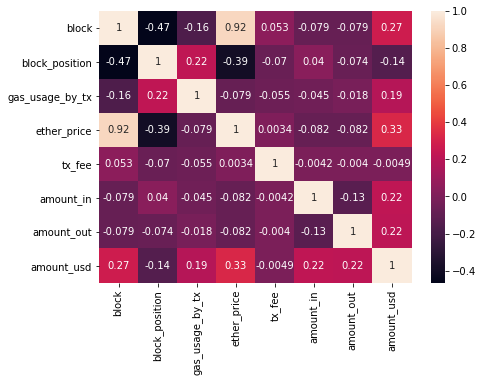

In [9]:
plt.figure(figsize=(7, 5))
sns.heatmap(nft_possible_mevs_df.corr(), annot=True)
plt.show()

In [10]:
nft_possible_mevs_df.sort_values(by=['timestamp', 'block_position'], inplace=True)

# Connecting received MEV attacks data with original swaps information

## General steps

All presented in the current notebook pools contain combination of NFT or NFT-related tokens with Ethereum token, meaning that all transformations of tokens into USD or gas usage into USD it is required to have a daily Ethereum token price. Therefore, here is taken simulation with information about Ethereum token price in USDC based on daily reserves information from Uniswap V2 (reserves distribution look almost identical to the external markets Ethereum price distribution)

In [11]:
weth_usdc_sim = Simulation(experiment_id = 2, x_name = 'WETH', y_name = 'USDC', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_",
                           x_index='1', y_index='0')
weth_price_df = weth_usdc_sim.get_daily_token_price(True, 'WETH')

In [12]:
nft_possible_mevs_df = nft_possible_mevs_df[['txd', 'block', 'block_position', 'gas_usage_by_tx', 'ether_price', 'tx_fee']]

## AXS/WETH

In [13]:
axs_weth_suspicious_filtered_swaps_df, axs_weth_possible_mevs_df = axs_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 4588, filtered len = 4512
txds = 76
out values = 38.0


In [14]:
axs_weth_possible_mevs_df = axs_weth_sim.calculate_attack_profit(axs_weth_possible_mevs_df)
axs_weth_possible_mevs_df = axs_weth_sim.calculate_attack_profit_by_token(axs_weth_possible_mevs_df)

In [15]:
axs_price_df = axs_weth_sim.get_daily_token_price(first_to_second=False, token_name='AXS')
axs_price_df

,date,AXS_price
0,2021-05-03,0.002948
1,2021-05-04,0.002419
2,2021-05-05,0.002548
3,2021-05-06,0.002134
4,2021-05-07,0.002408
...,...,...
184,2021-11-20,0.029520
185,2021-11-21,0.031058
186,2021-11-22,0.031829
187,2021-11-23,0.030013


In [16]:
axs_weth_possible_mevs_df['date'] = axs_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
weth_price_df['date'] = weth_price_df['date'].dt.strftime("%Y-%m-%d")
axs_price_df['date'] = axs_price_df['date'].dt.strftime("%Y-%m-%d")

In [17]:
axs_weth_possible_mevs_df = pd.merge(axs_weth_possible_mevs_df, weth_price_df, on='date', how='left')
axs_weth_possible_mevs_df = pd.merge(axs_weth_possible_mevs_df, axs_price_df, on='date', how='left')
axs_weth_possible_mevs_df = pd.merge(axs_weth_possible_mevs_df, nft_possible_mevs_df, on='txd', how='left')

In [18]:
axs_weth_possible_mevs_df['bruto_axs_to_weth_profit'] = axs_weth_possible_mevs_df['AXS_profit'] * axs_weth_possible_mevs_df['AXS_price']
axs_weth_possible_mevs_df['bruto_total_profit'] = ((axs_weth_possible_mevs_df['bruto_axs_to_weth_profit'] * axs_weth_possible_mevs_df['WETH_price']) +
                                                   (axs_weth_possible_mevs_df['WETH_profit'] * axs_weth_possible_mevs_df['WETH_price']))
axs_weth_possible_mevs_df.loc[axs_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = axs_weth_possible_mevs_df['tx_fee'].median()
axs_weth_possible_mevs_df.loc[axs_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = axs_weth_possible_mevs_df['tx_fee'].median()
axs_weth_possible_mevs_df['gas_costs_usd'] = (axs_weth_possible_mevs_df['tx_fee'] * axs_weth_possible_mevs_df['WETH_price'] *
                                              axs_weth_possible_mevs_df['gas_usage_by_tx'])
axs_weth_possible_mevs_df['netto_profit'] = axs_weth_possible_mevs_df['bruto_total_profit'] - axs_weth_possible_mevs_df['gas_costs_usd']
axs_weth_possible_mevs_df.dropna(inplace=True)

In [19]:
print(len(axs_weth_possible_mevs_df))
axs_weth_possible_mevs_df

76


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,AXS_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_axs_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,AXS,WETH,1453.949686,200.157590,312150.092977,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...,290480.691023,...,0.002948,12358321,6,76180,3432.21,1.000000e-09,0.000000e+00,539.671873,0.260880,539.410993
1,WETH,AXS,200.000000,1453.949686,602630.784000,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...,290480.691023,...,0.002948,12358321,3,116312,3432.21,1.000000e-09,0.000000e+00,539.671873,0.398313,539.273560
2,WETH,AXS,1.710000,315.441608,5784.433126,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...,1063.370397,...,0.002948,12358324,45,127234,3432.21,4.000000e-08,0.000000e+00,94.155426,17.428644,76.726782
3,AXS,WETH,315.441608,1.737494,4721.062730,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...,1063.370397,...,0.002948,12358324,47,78879,3432.21,4.000000e-08,0.000000e+00,94.155426,10.804926,83.350500
4,AXS,WETH,171.943376,0.805030,2301.348308,2021-05-03 01:46:13,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...,85.190273,...,0.002948,12358334,29,78879,3432.21,3.300000e-08,0.000000e+00,188.450122,8.914064,179.536057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,WETH,AXS,0.742013,18.790297,3392.839473,2021-10-25 13:07:23,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,0xe34bdee14c90167fb7d2da11813da90bd80f833b8e87...,440.739986,...,0.030911,13486793,0,87294,4220.26,6.140011e-08,0.000000e+00,194.031371,22.558057,171.473314
72,AXS,WETH,159.853255,22.421754,64288.248651,2021-11-15 10:23:17,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x98e6a68378587bf949b5d684db719a86a4dc485850c2...,231347.440993,...,0.030915,13619799,4,114149,4561.38,3.177643e-07,4.817748e-02,303.652297,165.485528,138.166769
73,WETH,AXS,22.403374,158.294883,295635.689643,2021-11-15 10:23:17,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x0c365789dbbb94a29f8720dc465554c587e897db,0xaeb440271e91a3404c5364c7d4d5d15d3ab63e434ccd...,231347.440993,...,0.030915,13619799,2,133008,4561.38,7.632295e-08,4.817748e-02,303.652297,46.314366,257.337931
74,WETH,AXS,0.268942,8.468738,1144.172998,2021-11-22 10:07:54,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x3ef775c8c45e1e6aa5fb9308b104201b6e4b982ea2ad...,82.936897,...,0.031829,13663877,5,85725,4090.46,1.042107e-07,2.695502e-07,119.112510,36.578597,82.533913


In [20]:
axs_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [21]:
print(len(axs_weth_possible_mevs_df))
axs_weth_possible_mevs_df

76


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,AXS_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_axs_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,AXS,WETH,1453.949686,200.157590,312150.092977,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...,290480.691023,...,0.002948,12358321,6,76180,3432.21,1.000000e-09,0.000000e+00,539.671873,0.260880,539.410993
1,WETH,AXS,200.000000,1453.949686,602630.784000,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...,290480.691023,...,0.002948,12358321,3,116312,3432.21,1.000000e-09,0.000000e+00,539.671873,0.398313,539.273560
2,WETH,AXS,1.710000,315.441608,5784.433126,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...,1063.370397,...,0.002948,12358324,45,127234,3432.21,4.000000e-08,0.000000e+00,94.155426,17.428644,76.726782
3,AXS,WETH,315.441608,1.737494,4721.062730,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...,1063.370397,...,0.002948,12358324,47,78879,3432.21,4.000000e-08,0.000000e+00,94.155426,10.804926,83.350500
4,AXS,WETH,171.943376,0.805030,2301.348308,2021-05-03 01:46:13,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...,85.190273,...,0.002948,12358334,29,78879,3432.21,3.300000e-08,0.000000e+00,188.450122,8.914064,179.536057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,WETH,AXS,0.742013,18.790297,3392.839473,2021-10-25 13:07:23,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,0xe34bdee14c90167fb7d2da11813da90bd80f833b8e87...,440.739986,...,0.030911,13486793,0,87294,4220.26,6.140011e-08,0.000000e+00,194.031371,22.558057,171.473314
72,AXS,WETH,159.853255,22.421754,64288.248651,2021-11-15 10:23:17,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x98e6a68378587bf949b5d684db719a86a4dc485850c2...,231347.440993,...,0.030915,13619799,4,114149,4561.38,3.177643e-07,4.817748e-02,303.652297,165.485528,138.166769
73,WETH,AXS,22.403374,158.294883,295635.689643,2021-11-15 10:23:17,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x0c365789dbbb94a29f8720dc465554c587e897db,0xaeb440271e91a3404c5364c7d4d5d15d3ab63e434ccd...,231347.440993,...,0.030915,13619799,2,133008,4561.38,7.632295e-08,4.817748e-02,303.652297,46.314366,257.337931
74,WETH,AXS,0.268942,8.468738,1144.172998,2021-11-22 10:07:54,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x3ef775c8c45e1e6aa5fb9308b104201b6e4b982ea2ad...,82.936897,...,0.031829,13663877,5,85725,4090.46,1.042107e-07,2.695502e-07,119.112510,36.578597,82.533913


In [22]:
axs_weth_count_df = axs_weth_possible_mevs_df.value_counts(subset=['timestamp'])
axs_weth_count_df[axs_weth_count_df.values > 2]

Series([], dtype: int64)

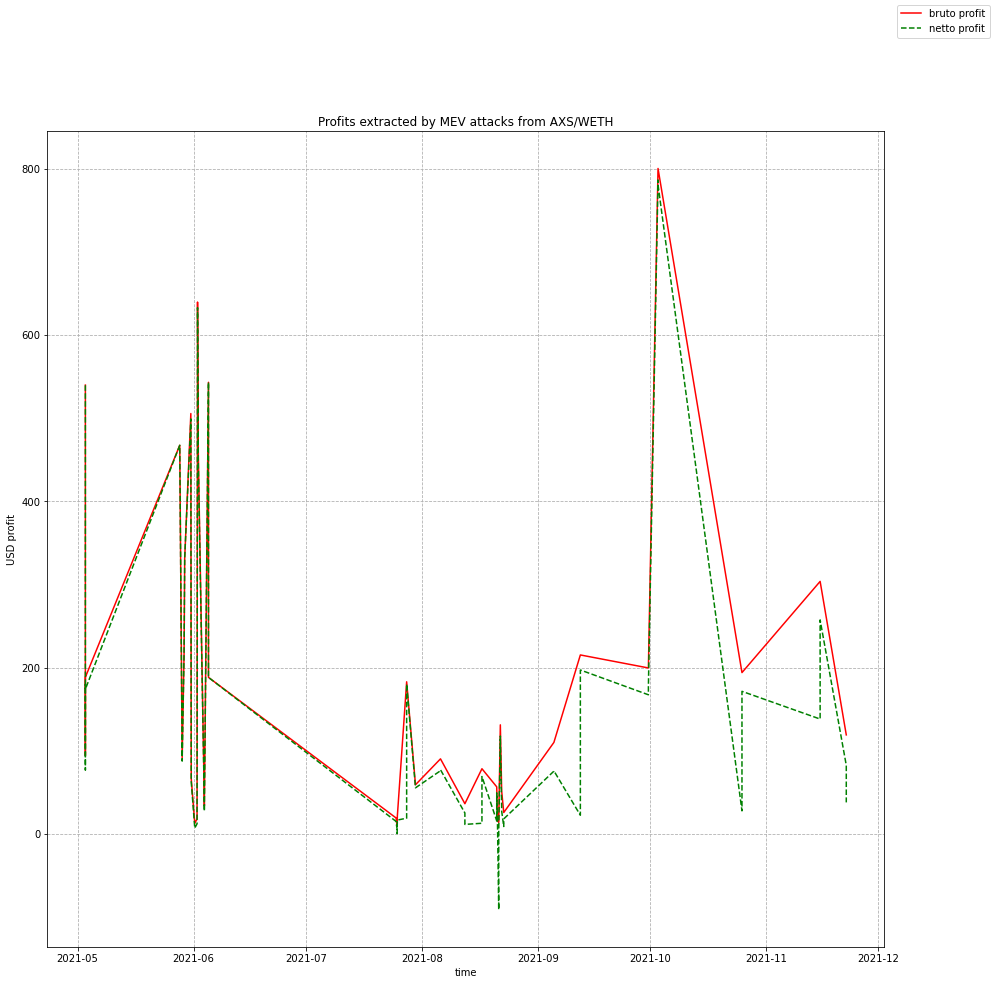

In [23]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(axs_weth_possible_mevs_df.timestamp, axs_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(axs_weth_possible_mevs_df.timestamp, axs_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from AXS/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [24]:
print("max bruto profit in USD = " +
      str(axs_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 800.0841249086137


In [25]:
print("min bruto profit in USD = " +
      str(axs_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 10.359007058650839


In [26]:
print("max netto profit in USD = " +
      str(axs_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 786.2913039469514


In [27]:
print("min netto profit in USD = " +
      str(axs_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -91.0831722669285


In [28]:
print("amount of zero bruto profit possible attacks = " +
      str(len(axs_weth_possible_mevs_df[axs_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [29]:
print("amount of losses attacks = " +
      str(len(axs_weth_possible_mevs_df[axs_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 1


In [30]:
axs_weth_possible_mevs_df[axs_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,AXS_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_axs_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
54,WETH,AXS,0.046957,2.167403,154.985848,2021-08-21 12:59:51,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x0c365789dbbb94a29f8720dc465554c587e897db,0x4f7f89e5774aaecf7c53a0d60ec41546955a419f293b...,1.109577,...,0.023971,13068771,3,112050,3226.59,2.901631e-07,0.004351,14.071759,105.154932,-91.083172


## MANA/WETH

In [31]:
mana_weth_suspicious_filtered_swaps_df, mana_weth_possible_mevs_df = mana_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 71999, filtered len = 70459
txds = 1540
out values = 770.0


In [32]:
mana_weth_possible_mevs_df = mana_weth_sim.calculate_attack_profit(mana_weth_possible_mevs_df)
mana_weth_possible_mevs_df = mana_weth_sim.calculate_attack_profit_by_token(mana_weth_possible_mevs_df)

In [33]:
mana_price_df = mana_weth_sim.get_daily_token_price(first_to_second=False, token_name='MANA')
mana_price_df

,date,MANA_price
0,2020-05-18,0.000187
1,2020-05-19,0.000171
2,2020-05-20,0.000179
3,2020-05-21,0.000184
4,2020-05-22,0.000193
...,...,...
551,2021-11-20,0.000915
552,2021-11-21,0.000857
553,2021-11-22,0.001000
554,2021-11-23,0.000920


In [34]:
mana_weth_possible_mevs_df['date'] = mana_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
mana_price_df['date'] = mana_price_df['date'].dt.strftime("%Y-%m-%d")

In [35]:
mana_weth_possible_mevs_df = pd.merge(mana_weth_possible_mevs_df, weth_price_df, on='date', how='left')
mana_weth_possible_mevs_df = pd.merge(mana_weth_possible_mevs_df, mana_price_df, on='date', how='left')
mana_weth_possible_mevs_df = pd.merge(mana_weth_possible_mevs_df, nft_possible_mevs_df, on='txd', how='left')

In [36]:
mana_weth_possible_mevs_df['bruto_mana_to_weth_profit'] = mana_weth_possible_mevs_df['MANA_profit'] * mana_weth_possible_mevs_df['MANA_price']
mana_weth_possible_mevs_df['bruto_total_profit'] = ((mana_weth_possible_mevs_df['bruto_mana_to_weth_profit'] * mana_weth_possible_mevs_df['WETH_price']) +
                                                   (mana_weth_possible_mevs_df['WETH_profit'] * mana_weth_possible_mevs_df['WETH_price']))
mana_weth_possible_mevs_df.loc[mana_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = mana_weth_possible_mevs_df['tx_fee'].median()
mana_weth_possible_mevs_df.loc[mana_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = mana_weth_possible_mevs_df['tx_fee'].median()
mana_weth_possible_mevs_df['gas_costs_usd'] = (mana_weth_possible_mevs_df['tx_fee'] * mana_weth_possible_mevs_df['WETH_price'] *
                                              mana_weth_possible_mevs_df['gas_usage_by_tx'])
mana_weth_possible_mevs_df['netto_profit'] = mana_weth_possible_mevs_df['bruto_total_profit'] - mana_weth_possible_mevs_df['gas_costs_usd']
mana_weth_possible_mevs_df.dropna(inplace=True)

In [37]:
print(len(mana_weth_possible_mevs_df))
mana_weth_possible_mevs_df

1150


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,MANA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mana_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
6,MANA,WETH,3151.239145,0.532322,126.257659,2020-07-10 20:11:56,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x676a9f786f817ff5cd2400b9e62b225cfce3db96bfc6...,1.131061,...,0.000166,10433790.0,180.0,89432.0,241.21,2.420000e-08,0.000000e+00,0.890458,0.523958,0.366500
7,WETH,MANA,0.536000,3151.239145,127.388720,2020-07-10 20:11:56,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x85e9479ec9a385b8527c51932b24f04e36a6ae489e39...,1.131061,...,0.000166,10433790.0,153.0,125912.0,241.21,2.420000e-08,0.000000e+00,0.890458,0.737684,0.152774
8,WETH,MANA,1.731597,10000.000000,412.496307,2020-07-11 12:51:58,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x36abe99e7661965fc873a800a1bb58068ba3f2f0,0x17009e64c0603af22f12d21dd2693bed9e8eda21ab86...,11.279103,...,0.000169,10438319.0,51.0,118881.0,239.25,4.000000e-08,8.143099e-02,36.662753,1.139724,35.523029
9,MANA,WETH,10482.933837,1.803133,423.775410,2020-07-11 12:51:58,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x4ee252e1db14cf8bdf51260d28bdbd9f730e93d91c9a...,11.279103,...,0.000169,10438319.0,52.0,566717.0,239.25,4.000000e-08,8.143099e-02,36.662753,5.433173,31.229581
12,MANA,WETH,9678.692485,1.433910,444.997840,2020-07-29 00:34:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x79e0249815bb6111c7545f9d1307c03225a59d2892dc...,27.412399,...,0.000155,10551264.0,71.0,592559.0,318.27,4.200000e-08,4.970361e-02,33.284524,7.903429,25.381095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,MANA,WETH,68186.669937,69.771339,294646.699236,2021-11-19 15:25:19,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xcf0f5bade7968e1ede7839637e4354b4d0e216216710...,5646.301457,...,0.001003,13646324.0,2.0,79746.0,4299.27,1.567659e-05,1.632601e-07,5734.511569,5361.884101,372.627468
1560,WETH,MANA,6.547937,6623.813662,27673.019184,2021-11-19 16:54:24,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x14c01c2a54709f7d1e252e37af16684efb2fbf994a69...,246.612468,...,0.001003,13646724.0,5.0,88722.0,4299.27,1.075722e-07,6.643525e-06,242.869883,40.934375,201.935508
1561,MANA,WETH,6623.807038,6.604556,27919.631652,2021-11-19 16:54:24,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0xb414426fe3dd7d558eddc88a1378d0f5d7b818f259c3...,246.612468,...,0.001003,13646724.0,7.0,78870.0,4299.27,5.881966e-07,6.643525e-06,242.869883,198.971631,43.898252
1562,WETH,MANA,10.170380,10579.185460,43398.317335,2021-11-19 19:17:57,0x00000000a1f2d3063ed639d19a6a56be87e25b1a,0x00000000a1f2d3063ed639d19a6a56be87e25b1a,0x17b8fdbe43e88eb5424eef2af00ad450a17a876320e8...,1311.880516,...,0.001003,13647368.0,0.0,88993.0,4299.27,1.038494e-07,0.000000e+00,1290.243733,39.638469,1250.605264


In [38]:
mana_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [39]:
print(len(mana_weth_possible_mevs_df))
mana_weth_possible_mevs_df

1134


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,MANA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mana_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
6,MANA,WETH,3151.239145,0.532322,126.257659,2020-07-10 20:11:56,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x676a9f786f817ff5cd2400b9e62b225cfce3db96bfc6...,1.131061,...,0.000166,10433790.0,180.0,89432.0,241.21,2.420000e-08,0.000000e+00,0.890458,0.523958,0.366500
7,WETH,MANA,0.536000,3151.239145,127.388720,2020-07-10 20:11:56,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x2cfc01e9da094b41b15f8284c6b0b3d3204f3942,0x85e9479ec9a385b8527c51932b24f04e36a6ae489e39...,1.131061,...,0.000166,10433790.0,153.0,125912.0,241.21,2.420000e-08,0.000000e+00,0.890458,0.737684,0.152774
8,WETH,MANA,1.731597,10000.000000,412.496307,2020-07-11 12:51:58,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x36abe99e7661965fc873a800a1bb58068ba3f2f0,0x17009e64c0603af22f12d21dd2693bed9e8eda21ab86...,11.279103,...,0.000169,10438319.0,51.0,118881.0,239.25,4.000000e-08,8.143099e-02,36.662753,1.139724,35.523029
9,MANA,WETH,10482.933837,1.803133,423.775410,2020-07-11 12:51:58,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x4ee252e1db14cf8bdf51260d28bdbd9f730e93d91c9a...,11.279103,...,0.000169,10438319.0,52.0,566717.0,239.25,4.000000e-08,8.143099e-02,36.662753,5.433173,31.229581
12,MANA,WETH,9678.692485,1.433910,444.997840,2020-07-29 00:34:49,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x79e0249815bb6111c7545f9d1307c03225a59d2892dc...,27.412399,...,0.000155,10551264.0,71.0,592559.0,318.27,4.200000e-08,4.970361e-02,33.284524,7.903429,25.381095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,MANA,WETH,68186.669937,69.771339,294646.699236,2021-11-19 15:25:19,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xcf0f5bade7968e1ede7839637e4354b4d0e216216710...,5646.301457,...,0.001003,13646324.0,2.0,79746.0,4299.27,1.567659e-05,1.632601e-07,5734.511569,5361.884101,372.627468
1560,WETH,MANA,6.547937,6623.813662,27673.019184,2021-11-19 16:54:24,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x14c01c2a54709f7d1e252e37af16684efb2fbf994a69...,246.612468,...,0.001003,13646724.0,5.0,88722.0,4299.27,1.075722e-07,6.643525e-06,242.869883,40.934375,201.935508
1561,MANA,WETH,6623.807038,6.604556,27919.631652,2021-11-19 16:54:24,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0xb414426fe3dd7d558eddc88a1378d0f5d7b818f259c3...,246.612468,...,0.001003,13646724.0,7.0,78870.0,4299.27,5.881966e-07,6.643525e-06,242.869883,198.971631,43.898252
1562,WETH,MANA,10.170380,10579.185460,43398.317335,2021-11-19 19:17:57,0x00000000a1f2d3063ed639d19a6a56be87e25b1a,0x00000000a1f2d3063ed639d19a6a56be87e25b1a,0x17b8fdbe43e88eb5424eef2af00ad450a17a876320e8...,1311.880516,...,0.001003,13647368.0,0.0,88993.0,4299.27,1.038494e-07,0.000000e+00,1290.243733,39.638469,1250.605264


In [40]:
mana_weth_count_df = mana_weth_possible_mevs_df.value_counts(subset=['timestamp'])
mana_weth_count_df[mana_weth_count_df.values > 2]

timestamp          
2020-08-09 02:14:40    4
2021-02-27 23:32:41    4
dtype: int64

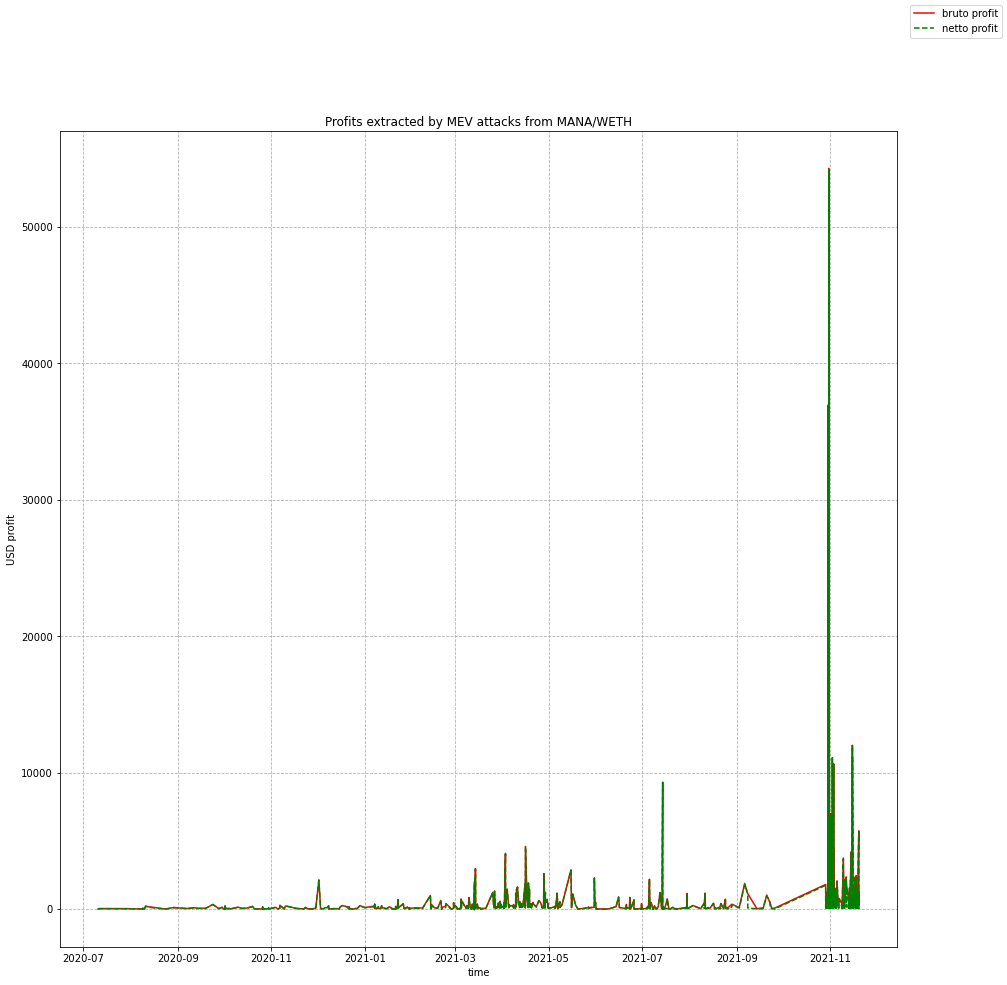

In [41]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(mana_weth_possible_mevs_df.timestamp, mana_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(mana_weth_possible_mevs_df.timestamp, mana_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from MANA/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [42]:
print("max bruto profit in USD = " +
      str(mana_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 54292.14128225694


In [43]:
print("min bruto profit in USD = " +
      str(mana_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.26549145957263526


In [44]:
print("max netto profit in USD = " +
      str(mana_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 54229.670968785984


In [45]:
print("min netto profit in USD = " +
      str(mana_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -48.302866913860456


In [46]:
print("amount of zero bruto profit possible attacks = " +
      str(len(mana_weth_possible_mevs_df[mana_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [47]:
print("amount of losses attacks = " +
      str(len(mana_weth_possible_mevs_df[mana_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 60


In [48]:
mana_weth_possible_mevs_df[mana_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,MANA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mana_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
32,MANA,WETH,13936.406457,3.771869,1436.093694,2020-08-10 00:25:40,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x6966a5008386d08101d15602c53dd73d381ae30e14da...,72.850286,...,0.000272,10628934.0,185.0,493572.0,395.84,5.600000e-08,0.012611,8.779647,10.924549,-2.144902
44,WETH,MANA,2.190497,9972.909505,874.285856,2020-08-23 21:48:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xf6fb09a41fa6c18cebc1e7c6f75a8664d69e4d48,0x25b98be3f1a01cef0ccd8e5f6d66ea6b71e50904f93d...,32.129076,...,0.000227,10719125.0,26.0,596267.0,390.72,5.800000e-08,0.006150,5.149801,13.559671,-8.409870
110,WETH,MANA,4.506216,19930.556495,1665.914736,2020-10-01 09:48:30,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0xc2b9bac9338c245010d8b7982f9a21aa9bfc38460c7f...,33.147474,...,0.000217,10969436.0,69.0,630704.0,353.09,7.600000e-08,0.015101,9.206245,16.865556,-7.659312
119,WETH,MANA,4.455483,20042.994184,1651.115196,2020-10-01 13:28:25,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0xbc1997027ebeaf07a6473b668332762cf6030bd19d46...,41.677888,...,0.000217,10970429.0,125.0,630704.0,353.09,7.400000e-08,0.009349,16.092785,16.421726,-0.328941
120,WETH,MANA,4.433090,19940.220552,1642.560502,2020-10-01 13:33:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0xb6f73e595e89e6c3ac16249d2a8dbbdf3e647086e8c5...,32.951603,...,0.000217,10970449.0,129.0,630704.0,353.09,7.300000e-08,0.012999,9.175020,16.199810,-7.024790
125,WETH,MANA,4.428238,19938.436062,1640.490401,2020-10-01 13:36:12,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0xe8e5dcfa7335bc9cdfc4d4585c962f49f37620d12473...,32.741529,...,0.000217,10970462.0,107.0,631112.0,353.09,7.300000e-08,0.013387,9.164698,16.210290,-7.045592
126,WETH,MANA,4.428969,19941.746985,1640.753332,2020-10-01 13:36:31,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0xac3ee30f8a33cae01f91d12ed39c4af5f79d941c6e06...,33.019939,...,0.000217,10970465.0,119.0,631320.0,353.09,7.300000e-08,0.012667,9.175382,16.215633,-7.040250
128,WETH,MANA,4.429283,19943.085765,1640.868781,2020-10-01 13:36:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0x34e9318982d4d298e72f115b2fd88a7396ac4373b93a...,33.131596,...,0.000217,10970466.0,52.0,631528.0,353.09,7.300000e-08,0.012376,9.179725,16.220975,-7.041250
131,WETH,MANA,4.428923,19941.400091,1640.728992,2020-10-01 13:37:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0x1b46ce30c12ee2a0ad727002a824888234fe0eb26878...,32.986817,...,0.000217,10970470.0,135.0,631968.0,353.09,7.300000e-08,0.012743,9.174307,16.232277,-7.057970
132,WETH,MANA,4.428306,19938.647258,1640.510950,2020-10-01 13:37:33,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0x02ff80fb56a42c5ce8471dc01ac1af9f029b0f0fcfb1...,32.751722,...,0.000217,10970472.0,189.0,631736.0,353.09,7.000000e-08,0.013341,9.165425,15.559483,-6.394058


## ENJ/WETH

In [49]:
enj_weth_suspicious_filtered_swaps_df, enj_weth_possible_mevs_df = enj_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 74876, filtered len = 73520
txds = 1356
out values = 678.0


In [50]:
enj_weth_possible_mevs_df = enj_weth_sim.calculate_attack_profit(enj_weth_possible_mevs_df)
enj_weth_possible_mevs_df = enj_weth_sim.calculate_attack_profit_by_token(enj_weth_possible_mevs_df)

In [51]:
enj_price_df = mana_weth_sim.get_daily_token_price(first_to_second=False, token_name='ENJ')
enj_price_df

,date,ENJ_price
0,2020-05-18,0.000187
1,2020-05-19,0.000171
2,2020-05-20,0.000179
3,2020-05-21,0.000184
4,2020-05-22,0.000193
...,...,...
551,2021-11-20,0.000915
552,2021-11-21,0.000857
553,2021-11-22,0.001000
554,2021-11-23,0.000920


In [52]:
enj_weth_possible_mevs_df['date'] = enj_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
enj_price_df['date'] = enj_price_df['date'].dt.strftime("%Y-%m-%d")

In [53]:
enj_weth_possible_mevs_df = pd.merge(enj_weth_possible_mevs_df, weth_price_df, on='date', how='left')
enj_weth_possible_mevs_df = pd.merge(enj_weth_possible_mevs_df, enj_price_df, on='date', how='left')
enj_weth_possible_mevs_df = pd.merge(enj_weth_possible_mevs_df, nft_possible_mevs_df, on='txd', how='left')

In [54]:
enj_weth_possible_mevs_df['bruto_enj_to_weth_profit'] = enj_weth_possible_mevs_df['ENJ_profit'] * enj_weth_possible_mevs_df['ENJ_price']
enj_weth_possible_mevs_df['bruto_total_profit'] = ((enj_weth_possible_mevs_df['bruto_enj_to_weth_profit'] * enj_weth_possible_mevs_df['WETH_price']) +
                                                   (enj_weth_possible_mevs_df['WETH_profit'] * enj_weth_possible_mevs_df['WETH_price']))
enj_weth_possible_mevs_df.loc[enj_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = enj_weth_possible_mevs_df['tx_fee'].median()
enj_weth_possible_mevs_df.loc[enj_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = enj_weth_possible_mevs_df['tx_fee'].median()
enj_weth_possible_mevs_df['gas_costs_usd'] = (enj_weth_possible_mevs_df['tx_fee'] * enj_weth_possible_mevs_df['WETH_price'] *
                                              enj_weth_possible_mevs_df['gas_usage_by_tx'])
enj_weth_possible_mevs_df['netto_profit'] = enj_weth_possible_mevs_df['bruto_total_profit'] - enj_weth_possible_mevs_df['gas_costs_usd']
enj_weth_possible_mevs_df.dropna(inplace=True)

In [55]:
print(len(enj_weth_possible_mevs_df))
enj_weth_possible_mevs_df

1079


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,ENJ_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_enj_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
8,ENJ,WETH,662.819938,0.535345,130.226365,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x76e6f84c717415f830511897756521926b8a78679c71...,0.550361,...,0.000172,10224660.0,188.0,99040.0,246.47,4.017321e-08,0.000000,0.822650,0.978427,-0.155777
9,WETH,ENJ,0.532000,662.819938,129.676004,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...,0.550361,...,0.000172,10224660.0,175.0,125049.0,246.47,4.017321e-08,0.000000,0.822650,1.235373,-0.412722
10,WETH,ENJ,0.243000,299.462624,57.721804,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x1ebb936de7f819bf3b0addc58718070d0411568f148a...,0.318893,...,0.000179,10260039.0,144.0,125049.0,238.21,1.200000e-08,0.000000,0.346391,0.357952,-0.011561
11,ENJ,WETH,299.462624,0.241548,57.402912,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xfa237d678d5e18bdb02a6137f4efb5ba9d95b0a60673...,0.318893,...,0.000179,10260039.0,145.0,99040.0,238.21,1.710000e-08,0.000000,0.346391,0.403990,-0.057599
12,WETH,ENJ,0.985333,1297.063144,231.717919,2020-06-24 18:06:50,0xeca2e07abc83c78a7178c46b84962af86de342ff,0xeca2e07abc83c78a7178c46b84962af86de342ff,0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...,0.745406,...,0.000181,10330038.0,4.0,99132.0,234.56,7.250000e-08,0.000000,4.298381,1.670445,2.627936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,WETH,ENJ,40.497569,39593.378482,176226.732818,2021-11-24 00:35:17,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0xe16be1798f860bc1eb0feb64cd67ca00ae9b6e58,0xeadea7bf4629aa8ea653725a16b22d46228cec07c5c7...,1649.225192,...,0.001236,13674069.0,4.0,243016.0,4271.96,8.998614e-08,0.845342,5214.108014,93.129718,5120.978296
1391,WETH,ENJ,45.719748,39750.256041,195093.199945,2021-11-24 05:46:09,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xe16be1798f860bc1eb0feb64cd67ca00ae9b6e58,0x74f074d40a250a5bf245d06140fef52256dea6439dd9...,4621.145508,...,0.001236,13675468.0,0.0,267570.0,4271.96,7.969358e-08,1.714054,11911.651937,90.811017,11820.840919
1392,ENJ,WETH,41136.706424,46.802705,199714.345453,2021-11-24 05:46:09,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xe8e5f4804f8ee161fe398144782f309ee8e117044629...,4621.145508,...,0.001236,13675468.0,2.0,205336.0,4271.96,2.467769e-06,1.714054,11911.651937,2157.980001,9753.671936
1393,ENJ,WETH,6060.278615,5.998629,25582.406849,2021-11-24 06:00:00,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0xad64f50ab093e30b287e1de370ad2e3bbaa358a02bd5...,71.659717,...,0.001236,13675530.0,5.0,78494.0,4271.96,1.169312e-07,0.000000,71.558871,39.088102,32.470769


In [56]:
enj_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [57]:
print(len(enj_weth_possible_mevs_df))
enj_weth_possible_mevs_df

1052


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,ENJ_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_enj_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
8,ENJ,WETH,662.819938,0.535345,130.226365,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x76e6f84c717415f830511897756521926b8a78679c71...,0.550361,...,0.000172,10224660.0,188.0,99040.0,246.47,4.017321e-08,0.000000,0.822650,0.978427,-0.155777
9,WETH,ENJ,0.532000,662.819938,129.676004,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...,0.550361,...,0.000172,10224660.0,175.0,125049.0,246.47,4.017321e-08,0.000000,0.822650,1.235373,-0.412722
10,WETH,ENJ,0.243000,299.462624,57.721804,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x1ebb936de7f819bf3b0addc58718070d0411568f148a...,0.318893,...,0.000179,10260039.0,144.0,125049.0,238.21,1.200000e-08,0.000000,0.346391,0.357952,-0.011561
11,ENJ,WETH,299.462624,0.241548,57.402912,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xfa237d678d5e18bdb02a6137f4efb5ba9d95b0a60673...,0.318893,...,0.000179,10260039.0,145.0,99040.0,238.21,1.710000e-08,0.000000,0.346391,0.403990,-0.057599
12,WETH,ENJ,0.985333,1297.063144,231.717919,2020-06-24 18:06:50,0xeca2e07abc83c78a7178c46b84962af86de342ff,0xeca2e07abc83c78a7178c46b84962af86de342ff,0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...,0.745406,...,0.000181,10330038.0,4.0,99132.0,234.56,7.250000e-08,0.000000,4.298381,1.670445,2.627936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,WETH,ENJ,40.497569,39593.378482,176226.732818,2021-11-24 00:35:17,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0xe16be1798f860bc1eb0feb64cd67ca00ae9b6e58,0xeadea7bf4629aa8ea653725a16b22d46228cec07c5c7...,1649.225192,...,0.001236,13674069.0,4.0,243016.0,4271.96,8.998614e-08,0.845342,5214.108014,93.129718,5120.978296
1391,WETH,ENJ,45.719748,39750.256041,195093.199945,2021-11-24 05:46:09,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xe16be1798f860bc1eb0feb64cd67ca00ae9b6e58,0x74f074d40a250a5bf245d06140fef52256dea6439dd9...,4621.145508,...,0.001236,13675468.0,0.0,267570.0,4271.96,7.969358e-08,1.714054,11911.651937,90.811017,11820.840919
1392,ENJ,WETH,41136.706424,46.802705,199714.345453,2021-11-24 05:46:09,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xe8e5f4804f8ee161fe398144782f309ee8e117044629...,4621.145508,...,0.001236,13675468.0,2.0,205336.0,4271.96,2.467769e-06,1.714054,11911.651937,2157.980001,9753.671936
1393,ENJ,WETH,6060.278615,5.998629,25582.406849,2021-11-24 06:00:00,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0xad64f50ab093e30b287e1de370ad2e3bbaa358a02bd5...,71.659717,...,0.001236,13675530.0,5.0,78494.0,4271.96,1.169312e-07,0.000000,71.558871,39.088102,32.470769


In [58]:
enj_weth_count_df = enj_weth_possible_mevs_df.value_counts(subset=['timestamp'])
enj_weth_count_df[enj_weth_count_df.values > 2]

timestamp          
2021-03-03 23:31:53    4
2021-10-30 20:43:15    4
dtype: int64

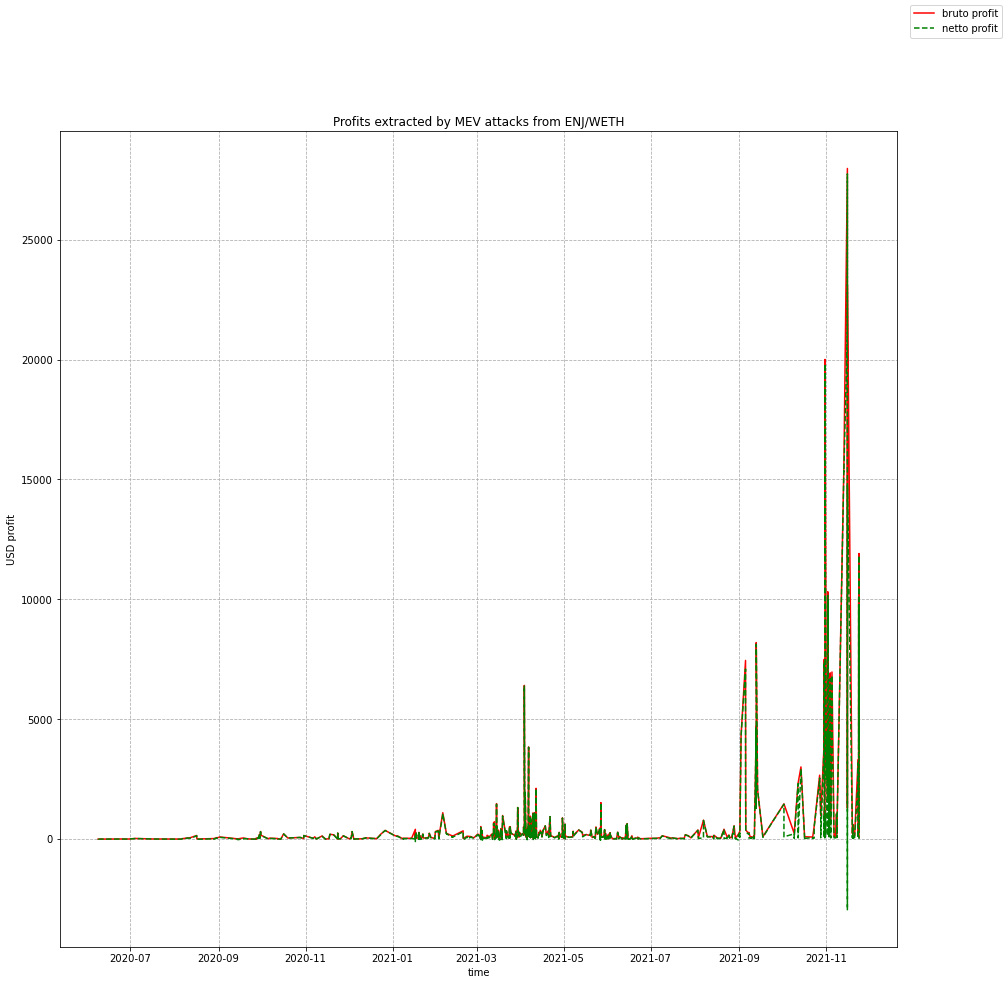

In [59]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(enj_weth_possible_mevs_df.timestamp, enj_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(enj_weth_possible_mevs_df.timestamp, enj_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from ENJ/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [60]:
print("max bruto profit in USD = " +
      str(enj_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 27974.85550778849


In [61]:
print("min bruto profit in USD = " +
      str(enj_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 9.281353847678553e-06


In [62]:
print("max netto profit in USD = " +
      str(enj_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 27747.989219742096


In [63]:
print("min netto profit in USD = " +
      str(enj_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -2947.9306171084118


In [64]:
print("amount of zero bruto profit possible attacks = " +
      str(len(enj_weth_possible_mevs_df[enj_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [65]:
print("amount of losses attacks = " +
      str(len(enj_weth_possible_mevs_df[enj_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 74


In [66]:
enj_weth_possible_mevs_df[enj_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,ENJ_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_enj_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
8,ENJ,WETH,662.819938,0.535345,130.226365,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x76e6f84c717415f830511897756521926b8a78679c71...,0.550361,...,0.000172,10224660.0,188.0,99040.0,246.47,4.017321e-08,0.000000,0.822650,0.978427,-0.155777
9,WETH,ENJ,0.532000,662.819938,129.676004,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...,0.550361,...,0.000172,10224660.0,175.0,125049.0,246.47,4.017321e-08,0.000000,0.822650,1.235373,-0.412722
10,WETH,ENJ,0.243000,299.462624,57.721804,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x1ebb936de7f819bf3b0addc58718070d0411568f148a...,0.318893,...,0.000179,10260039.0,144.0,125049.0,238.21,1.200000e-08,0.000000,0.346391,0.357952,-0.011561
11,ENJ,WETH,299.462624,0.241548,57.402912,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xfa237d678d5e18bdb02a6137f4efb5ba9d95b0a60673...,0.318893,...,0.000179,10260039.0,145.0,99040.0,238.21,1.710000e-08,0.000000,0.346391,0.403990,-0.057599
15,WETH,ENJ,0.400000,553.672738,89.406252,2020-06-29 12:37:46,0xeca2e07abc83c78a7178c46b84962af86de342ff,0xeca2e07abc83c78a7178c46b84962af86de342ff,0x6d272d8e088457fc68cfc433afd485634b54562fba3e...,0.615229,...,0.000168,10360783.0,24.0,127907.0,227.86,5.750000e-08,0.000000,1.286191,1.669889,-0.383698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,ENJ,WETH,1817.728245,1.048259,2443.616887,2021-06-18 11:18:09,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x6cce0aa509d56f8bafc7ceb3ae26a14d41c737c659f3...,7.542487,...,0.000290,12658113.0,6.0,75590.0,2233.57,6.380000e-08,0.000000,7.237043,10.786885,-3.549842
1148,WETH,ENJ,1.045024,1817.728245,2436.074400,2021-06-18 11:18:09,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x8272fabcc60cd112b23237938018e0d361b62b446ac2...,7.542487,...,0.000290,12658113.0,4.0,106798.0,2233.57,6.380000e-08,0.000000,7.237043,15.240346,-8.003303
1156,WETH,ENJ,0.966629,1939.721762,1869.237411,2021-06-22 06:10:09,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xf285565c003a5f7a33a356a9aa40c789ba403cb2569b...,12.698051,...,0.000232,12682357.0,3.0,106786.0,1880.83,6.380000e-08,0.000000,12.220010,12.753794,-0.533784
1233,WETH,ENJ,5.248533,8886.919623,17967.069812,2021-08-31 11:52:25,0x00000081c57cbc967248bea482c417207e84cffb,0x18f5e1a28cdc4bad5d19380dc717641eab1f53f1,0x2bfe16f1be8faa72cf84b9ea01d0ee832be98f69e53c...,0.000000,...,0.000274,13133124.0,2.0,118454.0,3435.17,5.635104e-07,0.055177,189.370558,229.089360,-39.718802


## SAND/WETH

In [67]:
sand_weth_suspicious_filtered_swaps_df, sand_weth_possible_mevs_df = sand_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 129994, filtered len = 128542
txds = 1452
out values = 726.0


In [68]:
sand_weth_possible_mevs_df = sand_weth_sim.calculate_attack_profit(sand_weth_possible_mevs_df)
sand_weth_possible_mevs_df = sand_weth_sim.calculate_attack_profit_by_token(sand_weth_possible_mevs_df)

In [69]:
sand_price_df = sand_weth_sim.get_daily_token_price(first_to_second=False, token_name='SAND')
sand_price_df

,date,SAND_price
0,2020-08-20,0.000140
1,2020-08-21,0.000118
2,2020-08-22,0.000129
3,2020-08-23,0.000124
4,2020-08-24,0.000125
...,...,...
457,2021-11-20,0.000958
458,2021-11-21,0.000945
459,2021-11-22,0.001212
460,2021-11-23,0.001234


In [70]:
sand_weth_possible_mevs_df['date'] = sand_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
sand_price_df['date'] = sand_price_df['date'].dt.strftime("%Y-%m-%d")

In [71]:
sand_weth_possible_mevs_df = pd.merge(sand_weth_possible_mevs_df, weth_price_df, on='date', how='left')
sand_weth_possible_mevs_df = pd.merge(sand_weth_possible_mevs_df, sand_price_df, on='date', how='left')
sand_weth_possible_mevs_df = pd.merge(sand_weth_possible_mevs_df, nft_possible_mevs_df, on='txd', how='left')

In [72]:
sand_weth_possible_mevs_df['bruto_sand_to_weth_profit'] = sand_weth_possible_mevs_df['SAND_profit'] * sand_weth_possible_mevs_df['SAND_price']
sand_weth_possible_mevs_df['bruto_total_profit'] = ((sand_weth_possible_mevs_df['bruto_sand_to_weth_profit'] * sand_weth_possible_mevs_df['WETH_price']) +
                                                   (sand_weth_possible_mevs_df['WETH_profit'] * sand_weth_possible_mevs_df['WETH_price']))
sand_weth_possible_mevs_df.loc[sand_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = sand_weth_possible_mevs_df['tx_fee'].median()
sand_weth_possible_mevs_df.loc[sand_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = sand_weth_possible_mevs_df['tx_fee'].median()
sand_weth_possible_mevs_df['gas_costs_usd'] = (sand_weth_possible_mevs_df['tx_fee'] * sand_weth_possible_mevs_df['WETH_price'] *
                                              sand_weth_possible_mevs_df['gas_usage_by_tx'])
sand_weth_possible_mevs_df['netto_profit'] = sand_weth_possible_mevs_df['bruto_total_profit'] - sand_weth_possible_mevs_df['gas_costs_usd']
sand_weth_possible_mevs_df.dropna(inplace=True)

In [73]:
print(len(sand_weth_possible_mevs_df))
sand_weth_possible_mevs_df

1466


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,SAND_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_sand_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,SAND,WETH,118333.466152,17.386836,6323.179425,2020-09-15 11:10:11,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xd25174f42596bc4eaa83116a368dd237664c9392,0x7d6d48beb1f5e8959f064205e73e94958b269a9ef293...,276.208551,...,0.000120,10866278.0,11.0,98071.0,364.19,1.930000e-07,0.000000e+00,156.175323,6.857185,149.318137
1,WETH,SAND,16.955749,118333.466152,6599.387976,2020-09-15 11:10:11,0x494cc492c9f01699bff1449180201dbfbd592ea5,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xe91d979c590e2f3e0eb14ebcc8e30830f43f92a82d34...,276.208551,...,0.000120,10866278.0,7.0,75555.0,364.19,1.930000e-07,0.000000e+00,156.175323,5.282853,150.892470
2,SAND,WETH,43526.185887,5.555634,1999.497878,2020-09-15 18:40:53,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xd25174f42596bc4eaa83116a368dd237664c9392,0xbe8846de9a4675486d9dea5da46f35b87c0b6b940525...,55.508100,...,0.000120,10868340.0,102.0,98071.0,364.19,1.060000e-07,0.000000e+00,11.836591,3.766123,8.070468
3,WETH,SAND,5.588306,43526.185887,2055.005978,2020-09-15 18:40:53,0x494cc492c9f01699bff1449180201dbfbd592ea5,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xc31cfff92e5bb388524b51d50ee193a33fdf3cf99bd2...,55.508100,...,0.000120,10868340.0,2.0,75555.0,364.19,3.720000e-07,0.000000e+00,11.836591,10.182493,1.654097
4,SAND,WETH,43096.029735,5.855678,2104.246690,2020-09-16 12:10:50,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xd25174f42596bc4eaa83116a368dd237664c9392,0x88a6999cf2724b03bb42e988cf9f1d36b240a3b147d8...,21.124332,...,0.000125,10873080.0,129.0,98071.0,365.19,1.180000e-07,0.000000e+00,66.128280,4.235129,61.893151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,WETH,SAND,12.693029,20489.353461,58970.926403,2021-11-13 02:30:19,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880,0x56fad757939d82a82c1976daf4f851bf309afc01e237...,708.659757,...,0.000604,13605053.0,0.0,86451.0,4645.64,1.115594e-07,0.000000e+00,708.460486,44.794703,663.665783
1520,SAND,WETH,105063.419069,70.109627,324602.318361,2021-11-13 08:46:25,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x3c1e03453ca898512b9752d11ed0969ee69e5b1c1e2c...,2097.672949,...,0.000604,13606678.0,2.0,85325.0,4645.64,1.142516e-07,0.000000e+00,2104.332470,45.278196,2059.054274
1521,WETH,SAND,69.656558,105063.419069,322504.645412,2021-11-13 08:46:25,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xbeba6d9961c9d2ec4fe278ffee723aa32a12b4e0905b...,2097.672949,...,0.000604,13606678.0,0.0,85926.0,4645.64,1.142516e-07,0.000000e+00,2104.332470,45.597120,2058.735350
1522,WETH,SAND,36.362099,52814.358671,167388.932464,2021-11-13 10:48:14,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x81885bdd6382d751c66e581273d4ae107b6d2fb80e0f...,2618.685348,...,0.000604,13607242.0,0.0,87749.0,4645.64,7.821967e-08,6.446748e-08,2642.141776,31.879295,2610.262481


In [74]:
sand_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [75]:
print(len(sand_weth_possible_mevs_df))
sand_weth_possible_mevs_df

1394


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,SAND_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_sand_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,SAND,WETH,118333.466152,17.386836,6323.179425,2020-09-15 11:10:11,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xd25174f42596bc4eaa83116a368dd237664c9392,0x7d6d48beb1f5e8959f064205e73e94958b269a9ef293...,276.208551,...,0.000120,10866278.0,11.0,98071.0,364.19,1.930000e-07,0.000000e+00,156.175323,6.857185,149.318137
1,WETH,SAND,16.955749,118333.466152,6599.387976,2020-09-15 11:10:11,0x494cc492c9f01699bff1449180201dbfbd592ea5,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xe91d979c590e2f3e0eb14ebcc8e30830f43f92a82d34...,276.208551,...,0.000120,10866278.0,7.0,75555.0,364.19,1.930000e-07,0.000000e+00,156.175323,5.282853,150.892470
2,SAND,WETH,43526.185887,5.555634,1999.497878,2020-09-15 18:40:53,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xd25174f42596bc4eaa83116a368dd237664c9392,0xbe8846de9a4675486d9dea5da46f35b87c0b6b940525...,55.508100,...,0.000120,10868340.0,102.0,98071.0,364.19,1.060000e-07,0.000000e+00,11.836591,3.766123,8.070468
3,WETH,SAND,5.588306,43526.185887,2055.005978,2020-09-15 18:40:53,0x494cc492c9f01699bff1449180201dbfbd592ea5,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xc31cfff92e5bb388524b51d50ee193a33fdf3cf99bd2...,55.508100,...,0.000120,10868340.0,2.0,75555.0,364.19,3.720000e-07,0.000000e+00,11.836591,10.182493,1.654097
4,SAND,WETH,43096.029735,5.855678,2104.246690,2020-09-16 12:10:50,0x494cc492c9f01699bff1449180201dbfbd592ea5,0xd25174f42596bc4eaa83116a368dd237664c9392,0x88a6999cf2724b03bb42e988cf9f1d36b240a3b147d8...,21.124332,...,0.000125,10873080.0,129.0,98071.0,365.19,1.180000e-07,0.000000e+00,66.128280,4.235129,61.893151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,WETH,SAND,12.693029,20489.353461,58970.926403,2021-11-13 02:30:19,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880,0x56fad757939d82a82c1976daf4f851bf309afc01e237...,708.659757,...,0.000604,13605053.0,0.0,86451.0,4645.64,1.115594e-07,0.000000e+00,708.460486,44.794703,663.665783
1520,SAND,WETH,105063.419069,70.109627,324602.318361,2021-11-13 08:46:25,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x3c1e03453ca898512b9752d11ed0969ee69e5b1c1e2c...,2097.672949,...,0.000604,13606678.0,2.0,85325.0,4645.64,1.142516e-07,0.000000e+00,2104.332470,45.278196,2059.054274
1521,WETH,SAND,69.656558,105063.419069,322504.645412,2021-11-13 08:46:25,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0xbeba6d9961c9d2ec4fe278ffee723aa32a12b4e0905b...,2097.672949,...,0.000604,13606678.0,0.0,85926.0,4645.64,1.142516e-07,0.000000e+00,2104.332470,45.597120,2058.735350
1522,WETH,SAND,36.362099,52814.358671,167388.932464,2021-11-13 10:48:14,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x81885bdd6382d751c66e581273d4ae107b6d2fb80e0f...,2618.685348,...,0.000604,13607242.0,0.0,87749.0,4645.64,7.821967e-08,6.446748e-08,2642.141776,31.879295,2610.262481


In [76]:
sand_weth_count_df = sand_weth_possible_mevs_df.value_counts(subset=['timestamp'])
sand_weth_count_df[sand_weth_count_df.values > 2]

timestamp          
2021-01-21 08:31:50    4
2020-09-25 09:51:42    4
2021-01-21 08:38:57    4
2021-01-21 08:24:41    4
2021-01-21 08:47:46    4
2020-11-30 06:04:25    4
2021-01-21 08:30:00    4
2021-01-21 08:26:33    4
2020-09-25 16:57:13    4
2021-01-21 08:26:26    4
2020-10-12 11:23:37    4
2021-01-21 08:09:22    4
2021-01-21 08:00:20    4
2021-01-21 08:34:15    4
2020-11-07 09:48:16    4
2021-01-21 08:06:54    4
2020-11-22 17:29:26    4
2020-09-27 05:30:02    4
dtype: int64

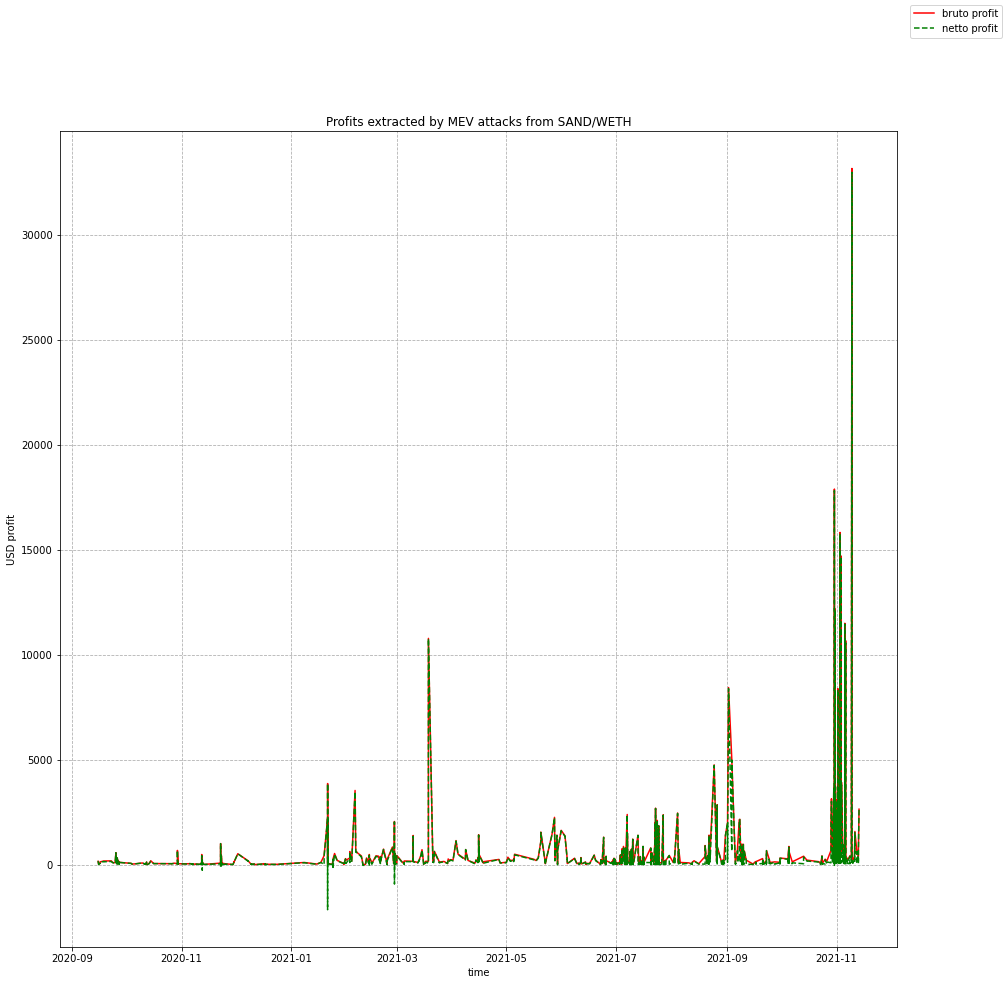

In [77]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(sand_weth_possible_mevs_df.timestamp, sand_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(sand_weth_possible_mevs_df.timestamp, sand_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from SAND/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [78]:
print("max bruto profit in USD = " +
      str(sand_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 33168.053139184136


In [79]:
print("min bruto profit in USD = " +
      str(sand_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.5970272170350499


In [80]:
print("max netto profit in USD = " +
      str(sand_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 32984.46244519543


In [81]:
print("min netto profit in USD = " +
      str(sand_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -2148.4612229991035


In [82]:
print("amount of zero bruto profit possible attacks = " +
      str(len(sand_weth_possible_mevs_df[sand_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [83]:
print("amount of losses attacks = " +
      str(len(sand_weth_possible_mevs_df[sand_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 53


In [84]:
sand_weth_possible_mevs_df[sand_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,SAND_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_sand_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
96,WETH,SAND,12.218652,91013.906939,4477.446943,2020-10-12 11:23:37,0x000000000000084e91743124a982076c59f10084,0x000000000000084e91743124a982076c59f10084,0xf5552a8117bdeb0bc9270b61d46a30391c6b850361e3...,7.102718,...,0.000124,11040462.0,1.0,101211.0,386.91,3.656912e-07,0.000000,7.533851,14.356368,-6.822517
154,WETH,SAND,10.510000,113622.319617,4931.255106,2020-11-11 18:22:50,0x00bf034cec51975faece51b285724301436b21c4,0x00bf034cec51975faece51b285724301436b21c4,0x4c60a5b76e1bfa78e603dd0d76bee93fc9f921205f05...,22.921177,...,0.000093,11237924.0,0.0,59139.0,463.91,1.073642e-06,0.000000,22.720173,29.514082,-6.793909
177,WETH,SAND,17.085558,160063.823264,7840.737430,2020-11-12 11:56:53,0x000000000000084e91743124a982076c59f10084,0x766445e101a5952a7313aef94ff79444302b2126,0xbf7d32311d64bd77cfd85246fcd25f3d8c23de0c2eb8...,243.227822,...,0.000083,11242661.0,1.0,70931.0,462.78,1.567416e-05,0.000000,245.520532,515.018238,-269.497706
179,WETH,SAND,7.460898,68887.835448,3424.582067,2020-11-12 12:23:32,0x000000000000084e91743124a982076c59f10084,0x000000000000084e91743124a982076c59f10084,0x9b1b602954a8aa428e0b58854fac966c755d759b64a2...,50.036276,...,0.000083,11242787.0,0.0,62967.0,462.78,5.430421e-06,0.000000,50.497608,158.397677,-107.900069
221,WETH,SAND,50.000000,599874.411574,27555.986466,2020-11-22 17:24:44,0x000000000000084e91743124a982076c59f10084,0x000000000000084e91743124a982076c59f10084,0x8ed34c8c5dc7f3be955385e0a2b58417cbcb3006424e...,412.517298,...,0.000080,11309362.0,0.0,62024.0,560.01,1.526345e-05,0.000000,415.412842,530.288668,-114.875826
229,WETH,SAND,14.820513,150481.527326,8170.790715,2020-11-22 17:28:18,0x0000000071e801062eb0544403f66176bba42dc0,0x0000000071e801062eb0544403f66176bba42dc0,0xcb21accb642053cc2fc8f664e96d50a4c4c5364ecaac...,115.433124,...,0.000080,11309373.0,0.0,58574.0,560.01,3.580564e-06,0.000000,117.281490,117.477917,-0.196427
255,WETH,SAND,28.138993,316438.871935,15791.878502,2020-11-23 03:15:16,0x000000000000084e91743124a982076c59f10084,0x000000000000084e91743124a982076c59f10084,0xf490f2a6db47ae619e55ceefb6608ae4f56bffc522fc...,396.199254,...,0.000079,11311992.0,1.0,62001.0,609.13,1.310016e-05,0.000000,434.151839,493.387394,-59.235555
286,SAND,WETH,2107.623106,0.187338,101.921802,2020-12-11 13:41:20,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x33f873c523245f0142db24bf931d2e51f4d8c2d5a3ae...,0.292041,...,0.000084,11431933.0,161.0,105900.0,544.14,6.000000e-08,0.000557,0.597027,3.467044,-2.870017
287,WETH,SAND,0.187875,2101.000000,102.213843,2020-12-11 13:41:20,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7afa41136b0384cb3e3283c47dcd488ba6713c28,0xfd398de820ce6afe49ad1dcaf5fc03e55c1143f821e4...,0.292041,...,0.000084,11431933.0,174.0,119975.0,544.14,6.000000e-08,0.000557,0.597027,3.927844,-3.330817
326,SAND,WETH,74072.836777,4.172811,5473.781924,2021-01-21 08:01:00,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0xcc2458be5846d00a337d2e71494e85f75420cc3ab57e...,131.252617,...,0.000096,11697577.0,2.0,86962.0,1111.49,1.510000e-06,0.000000,111.750122,146.657826,-34.907704


## ALICE/WETH

In [85]:
alice_weth_suspicious_filtered_swaps_df, alice_weth_possible_mevs_df = alice_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 8431, filtered len = 7877
txds = 554
out values = 277.0


In [86]:
alice_weth_possible_mevs_df = alice_weth_sim.calculate_attack_profit(alice_weth_possible_mevs_df)
alice_weth_possible_mevs_df = alice_weth_sim.calculate_attack_profit_by_token(alice_weth_possible_mevs_df)

In [87]:
alice_price_df = alice_weth_sim.get_daily_token_price(first_to_second=False, token_name='ALICE')
alice_price_df

,date,ALICE_price
0,2021-03-15,0.016933
1,2021-03-16,0.010279
2,2021-03-17,0.009842
3,2021-03-22,0.008325
4,2021-03-23,0.006360
...,...,...
246,2021-11-21,0.004264
247,2021-11-22,0.004784
248,2021-11-23,0.005554
249,2021-11-24,0.006316


In [88]:
alice_weth_possible_mevs_df['date'] = alice_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
alice_price_df['date'] = alice_price_df['date'].dt.strftime("%Y-%m-%d")

In [89]:
alice_weth_possible_mevs_df = pd.merge(alice_weth_possible_mevs_df, weth_price_df, on='date', how='left')
alice_weth_possible_mevs_df = pd.merge(alice_weth_possible_mevs_df, alice_price_df, on='date', how='left')
alice_weth_possible_mevs_df = pd.merge(alice_weth_possible_mevs_df, nft_possible_mevs_df, on='txd', how='left')

In [90]:
alice_weth_possible_mevs_df['bruto_alice_to_weth_profit'] = alice_weth_possible_mevs_df['ALICE_profit'] * alice_weth_possible_mevs_df['ALICE_price']
alice_weth_possible_mevs_df['bruto_total_profit'] = ((alice_weth_possible_mevs_df['bruto_alice_to_weth_profit'] * alice_weth_possible_mevs_df['WETH_price']) +
                                                     (alice_weth_possible_mevs_df['WETH_profit'] * alice_weth_possible_mevs_df['WETH_price']))
alice_weth_possible_mevs_df.loc[alice_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = alice_weth_possible_mevs_df['tx_fee'].median()
alice_weth_possible_mevs_df.loc[alice_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = alice_weth_possible_mevs_df['tx_fee'].median()
alice_weth_possible_mevs_df['gas_costs_usd'] = (alice_weth_possible_mevs_df['tx_fee'] * alice_weth_possible_mevs_df['WETH_price'] *
                                              alice_weth_possible_mevs_df['gas_usage_by_tx'])
alice_weth_possible_mevs_df['netto_profit'] = alice_weth_possible_mevs_df['bruto_total_profit'] - alice_weth_possible_mevs_df['gas_costs_usd']
alice_weth_possible_mevs_df.dropna(inplace=True)

In [91]:
print(len(alice_weth_possible_mevs_df))
alice_weth_possible_mevs_df

554


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,ALICE_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_alice_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,ALICE,WETH,678.023966,5.170192,8144.013616,2021-03-25 20:05:53,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0x716befcc5d23a5a8979ea44769baf18f7723f66f7c7c...,62.866979,...,0.007113,12110177.0,2.0,88615.0,1588.34,3.989700e-08,0.000000e+00,261.839222,5.620486,256.218736
1,WETH,ALICE,5.005486,678.023966,8206.880595,2021-03-25 20:05:53,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0xcebbd38ba925c4de6acc61c7bc4766ed334250ccbf82...,62.866979,...,0.007113,12110177.0,0.0,108210.0,1588.34,3.989700e-08,0.000000e+00,261.839222,6.863317,254.975906
2,ALICE,WETH,147.470989,1.278424,2329.634880,2021-03-31 05:01:22,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x5d2e322cfa2cda5035222f0a8257012b5fa791712651...,76.736822,...,0.007688,12145127.0,6.0,101202.0,1919.08,1.000000e-09,0.000000e+00,80.884874,0.194386,80.690488
3,WETH,ALICE,1.236314,147.470989,2252.898059,2021-03-31 05:01:22,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x78cb2fed966c84fc2dbb89e8a598bccf4103459b878a...,76.736822,...,0.007688,12145127.0,3.0,124827.0,1919.08,1.000000e-09,0.000000e+00,80.884874,0.239764,80.645110
4,ALICE,WETH,149.223306,1.309591,2385.424984,2021-03-31 05:08:04,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xc5c1afa1a377e58796724c12d7272325a4ec26f6b264...,76.326581,...,0.007688,12145155.0,6.0,101190.0,1919.08,1.000000e-09,0.000000e+00,80.486344,0.194363,80.291981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ALICE,WETH,238.961240,1.617275,6813.576611,2021-11-24 15:33:40,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...,284.270273,...,0.006316,13677996.0,4.0,85522.0,4271.96,1.396729e-07,0.000000e+00,287.354391,50.870707,236.483684
554,WETH,ALICE,1.560256,256.045544,6739.393988,2021-11-25 01:11:46,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880,0x9e891c4c39513d1db4654e1b1b7aea037299859e4f1e...,251.059427,...,0.006559,13680537.0,11.0,86680.0,4523.80,1.623907e-07,6.559175e-09,262.799934,63.643467,199.156467
555,ALICE,WETH,256.045543,1.618379,6990.453415,2021-11-25 01:11:46,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880,0xedbf10407b4365e3580b1c5dc9d7add521baf1d8bad9...,251.059427,...,0.006559,13680537.0,13.0,76443.0,4523.80,5.678490e-07,6.559175e-09,262.799934,196.265638,66.534296
556,WETH,ALICE,0.591637,98.144312,2540.077182,2021-11-25 04:45:37,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...,112.922226,...,0.006559,13681482.0,5.0,86131.0,4523.80,1.138215e-07,0.000000e+00,118.921719,44.325899,74.595820


In [92]:
alice_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [93]:
print(len(alice_weth_possible_mevs_df))
alice_weth_possible_mevs_df

550


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,ALICE_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_alice_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,ALICE,WETH,678.023966,5.170192,8144.013616,2021-03-25 20:05:53,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0x716befcc5d23a5a8979ea44769baf18f7723f66f7c7c...,62.866979,...,0.007113,12110177.0,2.0,88615.0,1588.34,3.989700e-08,0.000000e+00,261.839222,5.620486,256.218736
1,WETH,ALICE,5.005486,678.023966,8206.880595,2021-03-25 20:05:53,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0x86a53c9e32abd3677e38bd0b390f24dd080e6426,0xcebbd38ba925c4de6acc61c7bc4766ed334250ccbf82...,62.866979,...,0.007113,12110177.0,0.0,108210.0,1588.34,3.989700e-08,0.000000e+00,261.839222,6.863317,254.975906
2,ALICE,WETH,147.470989,1.278424,2329.634880,2021-03-31 05:01:22,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x5d2e322cfa2cda5035222f0a8257012b5fa791712651...,76.736822,...,0.007688,12145127.0,6.0,101202.0,1919.08,1.000000e-09,0.000000e+00,80.884874,0.194386,80.690488
3,WETH,ALICE,1.236314,147.470989,2252.898059,2021-03-31 05:01:22,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x78cb2fed966c84fc2dbb89e8a598bccf4103459b878a...,76.736822,...,0.007688,12145127.0,3.0,124827.0,1919.08,1.000000e-09,0.000000e+00,80.884874,0.239764,80.645110
4,ALICE,WETH,149.223306,1.309591,2385.424984,2021-03-31 05:08:04,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xc5c1afa1a377e58796724c12d7272325a4ec26f6b264...,76.326581,...,0.007688,12145155.0,6.0,101190.0,1919.08,1.000000e-09,0.000000e+00,80.486344,0.194363,80.291981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ALICE,WETH,238.961240,1.617275,6813.576611,2021-11-24 15:33:40,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x2650c5a496bb26d2f5ac814e214f69e5d0aa38557b2b...,284.270273,...,0.006316,13677996.0,4.0,85522.0,4271.96,1.396729e-07,0.000000e+00,287.354391,50.870707,236.483684
554,WETH,ALICE,1.560256,256.045544,6739.393988,2021-11-25 01:11:46,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880,0x9e891c4c39513d1db4654e1b1b7aea037299859e4f1e...,251.059427,...,0.006559,13680537.0,11.0,86680.0,4523.80,1.623907e-07,6.559175e-09,262.799934,63.643467,199.156467
555,ALICE,WETH,256.045543,1.618379,6990.453415,2021-11-25 01:11:46,0x000000005736775feb0c8568e7dee77222a26880,0x000000005736775feb0c8568e7dee77222a26880,0xedbf10407b4365e3580b1c5dc9d7add521baf1d8bad9...,251.059427,...,0.006559,13680537.0,13.0,76443.0,4523.80,5.678490e-07,6.559175e-09,262.799934,196.265638,66.534296
556,WETH,ALICE,0.591637,98.144312,2540.077182,2021-11-25 04:45:37,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x2fb8ed3eb1365605cf8ec8452557f416681b8822ad3c...,112.922226,...,0.006559,13681482.0,5.0,86131.0,4523.80,1.138215e-07,0.000000e+00,118.921719,44.325899,74.595820


In [94]:
alice_weth_count_df = alice_weth_possible_mevs_df.value_counts(subset=['timestamp'])
alice_weth_count_df[alice_weth_count_df.values > 2]

timestamp          
2021-08-21 05:01:53    4
dtype: int64

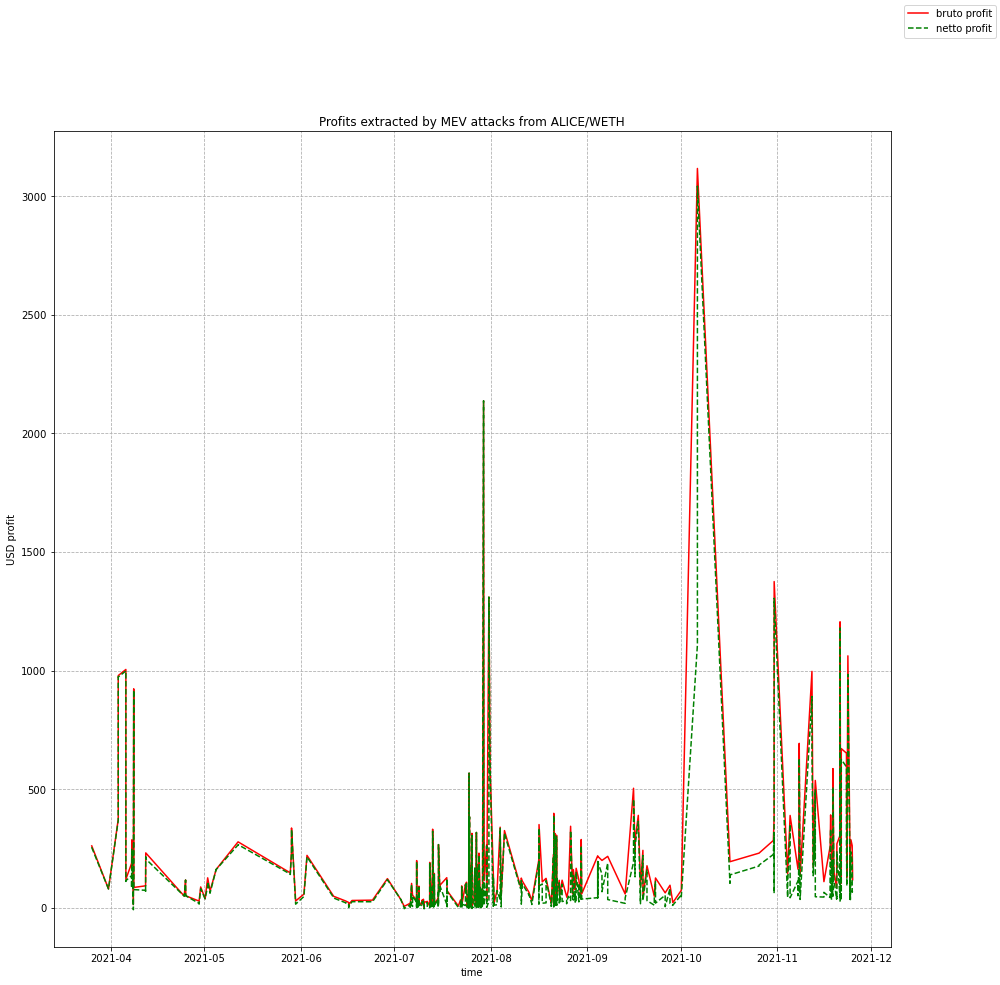

In [95]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(alice_weth_possible_mevs_df.timestamp, alice_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(alice_weth_possible_mevs_df.timestamp, alice_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from ALICE/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [96]:
print("max bruto profit in USD = " +
      str(alice_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 3116.6150537466992


In [97]:
print("min bruto profit in USD = " +
      str(alice_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 3.0517278468259326


In [98]:
print("max netto profit in USD = " +
      str(alice_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 3042.275539397415


In [99]:
print("min netto profit in USD = " +
      str(alice_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -7.248780255458991


In [100]:
print("amount of zero bruto profit possible attacks = " +
      str(len(alice_weth_possible_mevs_df[alice_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [101]:
print("amount of losses attacks = " +
      str(len(alice_weth_possible_mevs_df[alice_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 8


In [102]:
alice_weth_possible_mevs_df[alice_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,ALICE_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_alice_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
18,ALICE,WETH,627.395383,4.062855,8173.399712,2021-04-08 04:52:34,0x000000917de6037d52b1f0a306eecd208405f7cd,0x000000917de6037d52b1f0a306eecd208405f7cd,0x06414fb8c40865050d1f038ebd9691bedf11664e2e85...,13.790151,...,0.006191,12197122.0,35.0,84914.0,2081.11,9.600000e-08,6.190960e-09,14.235609,16.928895,-2.693286
19,WETH,ALICE,4.056000,627.395384,8159.609561,2021-04-08 04:52:34,0x000000917de6037d52b1f0a306eecd208405f7cd,0x000000917de6037d52b1f0a306eecd208405f7cd,0x065512a1e81cbd49587d59815ce20e61d766d08c577a...,13.790151,...,0.006191,12197122.0,31.0,107764.0,2081.11,9.600000e-08,6.190960e-09,14.235609,21.484389,-7.248780
81,WETH,ALICE,0.160690,80.218575,357.372205,2021-07-04 04:44:38,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdf638b09c707cf1ea87997c434b468e17593349c338e...,6.914099,...,0.002102,12758997.0,5.0,105608.0,2323.27,3.989700e-08,0.000000e+00,7.033308,9.808965,-2.775657
84,ALICE,WETH,150.840707,0.356473,795.374553,2021-07-06 03:11:42,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xb741a8f748440f7e1da9433ddf5cf36b646e7f0d4ece...,4.763147,...,0.002522,12771416.0,4.0,87334.0,2322.63,3.989700e-08,0.000000e+00,6.598128,8.086010,-1.487881
85,WETH,ALICE,0.353630,150.840707,790.611406,2021-07-06 03:11:42,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xf54809beeecfc64979ecc2a20fa4264cbfb05640cc75...,4.763147,...,0.002522,12771416.0,2.0,87976.0,2322.63,3.989700e-08,0.000000e+00,6.598128,8.145451,-1.547322
159,ALICE,WETH,128.868991,0.420440,881.832744,2021-07-10 13:51:28,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xc0bd15687d82c607750dcec066247c41657ecc07817f...,1.275388,...,0.003012,12800019.0,8.0,77974.0,2110.47,3.989700e-08,0.000000e+00,3.051728,6.580680,-3.528952
229,WETH,ALICE,1.552410,324.620645,3319.187141,2021-07-24 20:34:57,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x9bd2142bed12990005c3b676ac522ebb874174ce6e5a...,8.367302,...,0.004783,12891212.0,10.0,104453.0,2185.98,3.989700e-08,2.391363e-05,8.594773,9.096822,-0.502049
260,ALICE,WETH,99.353511,0.542210,1176.279731,2021-07-25 23:22:03,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x28d68958104e80e4b3075d5a02fcfa9596489bb36502...,4.774226,...,0.005406,12898337.0,4.0,78083.0,2194.34,3.989700e-08,0.000000e+00,4.819150,6.821936,-2.002786


# Meme pools analysis (DOGE/WETH, SHIB/WETH, ELON/WETH, SQUID/WETH)

In [103]:
# Meme token pools
doge_weth_sim = Simulation(experiment_id = 21, x_name = 'DOGE', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
elon_weth_sim = Simulation(experiment_id = 22, x_name = 'ELON', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
shib_weth_sim = Simulation(experiment_id = 23, x_name = 'SHIB', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
squid_weth_sim = Simulation(experiment_id = 24, x_name = 'SQUID', y_name = 'WETH', window_size = 24,
                            base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

In [104]:
doge_weth_swaps_df = doge_weth_sim.get_original_swaps_df()
elon_weth_swaps_df = elon_weth_sim.get_original_swaps_df()
shib_weth_swaps_df = shib_weth_sim.get_original_swaps_df()
squid_weth_swaps_df = squid_weth_sim.get_original_swaps_df()

In [105]:
meme_pools_list = [doge_weth_swaps_df, elon_weth_swaps_df, shib_weth_swaps_df,
                  squid_weth_swaps_df]
meme_pools_swaps_df = pd.concat(meme_pools_list)
meme_possible_mevs_df = pd.read_pickle('meme_pools_possible_mevs_with_gas_df.pkl')

In [106]:
meme_possible_mevs_df = pd.merge(meme_possible_mevs_df, meme_pools_swaps_df, on='txd', how='left')

In [107]:
meme_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37320 entries, 0 to 37319
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              37320 non-null  object        
 1   block            37320 non-null  object        
 2   block_position   37320 non-null  object        
 3   gas_usage_by_tx  37320 non-null  object        
 4   ether_price      37320 non-null  object        
 5   tx_fee           37320 non-null  object        
 6   token_in         37320 non-null  object        
 7   token_out        37320 non-null  object        
 8   amount_in        37320 non-null  float64       
 9   amount_out       37320 non-null  float64       
 10  amount_usd       37320 non-null  float64       
 11  timestamp        37320 non-null  datetime64[ns]
 12  sender           37320 non-null  object        
 13  to               37320 non-null  object        
 14  gas_price        37320 non-null  objec

In [108]:
meme_possible_mevs_df.drop(meme_possible_mevs_df.index[[20303]], inplace=True)

In [109]:
meme_possible_mevs_df['block'] = pd.to_numeric(meme_possible_mevs_df['block'])
meme_possible_mevs_df['block_position'] = pd.to_numeric(meme_possible_mevs_df['block_position'])
meme_possible_mevs_df['gas_usage_by_tx'] = pd.to_numeric(meme_possible_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
meme_possible_mevs_df['ether_price'] = meme_possible_mevs_df['ether_price'].str.replace('$', '')
meme_possible_mevs_df['ether_price'] = meme_possible_mevs_df['ether_price'].str.replace('Eth: ', '')
meme_possible_mevs_df['ether_price'] = pd.to_numeric(meme_possible_mevs_df['ether_price'].str.replace(',', ''))
meme_possible_mevs_df['tx_fee'] = pd.to_numeric(meme_possible_mevs_df['tx_fee'].str.replace('wei', ''))
meme_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37319 entries, 0 to 37319
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              37319 non-null  object        
 1   block            37319 non-null  int64         
 2   block_position   37319 non-null  int64         
 3   gas_usage_by_tx  37319 non-null  int64         
 4   ether_price      37319 non-null  float64       
 5   tx_fee           37319 non-null  float64       
 6   token_in         37319 non-null  object        
 7   token_out        37319 non-null  object        
 8   amount_in        37319 non-null  float64       
 9   amount_out       37319 non-null  float64       
 10  amount_usd       37319 non-null  float64       
 11  timestamp        37319 non-null  datetime64[ns]
 12  sender           37319 non-null  object        
 13  to               37319 non-null  object        
 14  gas_price        37319 non-null  objec

<ipython-input-109-dd6ecf399e57>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  meme_possible_mevs_df['ether_price'] = meme_possible_mevs_df['ether_price'].str.replace('$', '')


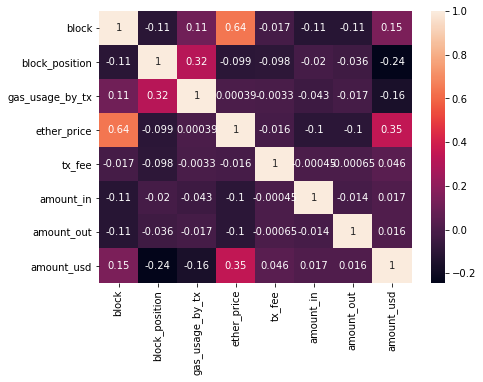

In [110]:
plt.figure(figsize=(7, 5))
sns.heatmap(meme_possible_mevs_df.corr(), annot=True)
plt.show()

In [111]:
meme_possible_mevs_df.sort_values(by=['timestamp', 'block_position'], inplace=True)

# Connecting received MEV attacks data with original swaps information

## General steps

In [112]:
meme_possible_mevs_df = meme_possible_mevs_df[['txd', 'block', 'block_position', 'gas_usage_by_tx', 'ether_price', 'tx_fee']]

## DOGE/WETH

In [113]:
doge_weth_suspicious_filtered_swaps_df, doge_weth_possible_mevs_df = doge_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 14343, filtered len = 13343
txds = 1000
out values = 500.0


In [114]:
doge_weth_possible_mevs_df = doge_weth_sim.calculate_attack_profit(doge_weth_possible_mevs_df)
doge_weth_possible_mevs_df = doge_weth_sim.calculate_attack_profit_by_token(doge_weth_possible_mevs_df)

In [115]:
doge_price_df = doge_weth_sim.get_daily_token_price(first_to_second=False, token_name='DOGE')
doge_price_df

,date,DOGE_price
0,2021-01-18,0.000008
1,2021-01-19,0.000007
2,2021-01-22,0.000007
3,2021-01-25,0.000006
4,2021-01-26,0.000006
...,...,...
362,2022-01-21,0.000056
363,2022-01-22,0.000055
364,2022-01-23,0.000056
365,2022-01-24,0.000056


In [116]:
doge_weth_possible_mevs_df['date'] = doge_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
doge_price_df['date'] = doge_price_df['date'].dt.strftime("%Y-%m-%d")

In [117]:
doge_weth_possible_mevs_df = pd.merge(doge_weth_possible_mevs_df, weth_price_df, on='date', how='left')
doge_weth_possible_mevs_df = pd.merge(doge_weth_possible_mevs_df, doge_price_df, on='date', how='left')
doge_weth_possible_mevs_df = pd.merge(doge_weth_possible_mevs_df, meme_possible_mevs_df, on='txd', how='left')

In [118]:
doge_weth_possible_mevs_df['bruto_doge_to_weth_profit'] = doge_weth_possible_mevs_df['DOGE_profit'] * doge_weth_possible_mevs_df['DOGE_price']
doge_weth_possible_mevs_df['bruto_total_profit'] = ((doge_weth_possible_mevs_df['bruto_doge_to_weth_profit'] * doge_weth_possible_mevs_df['WETH_price']) +
                                                   (doge_weth_possible_mevs_df['WETH_profit'] * doge_weth_possible_mevs_df['WETH_price']))
doge_weth_possible_mevs_df.loc[doge_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = doge_weth_possible_mevs_df['tx_fee'].median()
doge_weth_possible_mevs_df.loc[doge_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = doge_weth_possible_mevs_df['tx_fee'].median()
doge_weth_possible_mevs_df['gas_costs_usd'] = (doge_weth_possible_mevs_df['tx_fee'] * doge_weth_possible_mevs_df['WETH_price'] *
                                              doge_weth_possible_mevs_df['gas_usage_by_tx'])
doge_weth_possible_mevs_df['netto_profit'] = doge_weth_possible_mevs_df['bruto_total_profit'] - doge_weth_possible_mevs_df['gas_costs_usd']
doge_weth_possible_mevs_df.dropna(inplace=True)

In [119]:
print(len(doge_weth_possible_mevs_df))
doge_weth_possible_mevs_df

1014


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,DOGE_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_doge_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,DOGE,WETH,156081.797086,1.087636,1438.742079,2021-01-19 02:15:14,0x72aa814b8125f94c0341812994e8574f6c395660,0x72aa814b8125f94c0341812994e8574f6c395660,0x29f1198e83ea9535c39e3eb154e935842383d354ccf2...,98999999999,...,0.000007,11682958.0,187.0,65948.0,1367.65,9.900000e-08,0.000000e+00,39.670434,8.973224,30.697210
1,WETH,DOGE,1.058772,156081.797086,1400.560434,2021-01-19 02:15:14,0x72aa814b8125f94c0341812994e8574f6c395660,0x72aa814b8125f94c0341812994e8574f6c395660,0xebf2cf1a00e3cce72bd4240382d5630e5fac0e208ec5...,99000001072,...,0.000007,11682958.0,153.0,86483.0,1367.65,9.900000e-08,0.000000e+00,39.670434,11.767322,27.903113
2,WETH,DOGE,1.592920,265498.347401,2039.545460,2021-01-28 04:35:38,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0x99c968684c6fbde3aaa264f98bce923a70ec3adb3ecb...,114230982615,...,0.000018,11742210.0,6.0,76466.0,1330.78,1.142310e-07,1.813409e-13,319.004031,11.652027,307.352004
3,WETH,DOGE,1.592920,265498.347401,2039.545460,2021-01-28 04:35:38,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0x99c968684c6fbde3aaa264f98bce923a70ec3adb3ecb...,114230982615,...,0.000018,11742210.0,6.0,76466.0,1330.78,1.142310e-07,1.813409e-13,319.004031,11.652027,307.352004
4,WETH,DOGE,1.592920,265498.347401,2039.545460,2021-01-28 04:35:38,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0x99c968684c6fbde3aaa264f98bce923a70ec3adb3ecb...,114230982615,...,0.000018,11742210.0,6.0,76466.0,1330.78,1.142310e-07,1.813409e-13,319.004031,11.652027,307.352004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,DOGE,WETH,31857.166799,1.476839,5986.807600,2021-12-25 00:56:55,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x9bac128c5bbd4e96ea440fad7a365353093ea6b8c5e8...,106775699131,...,0.000047,13871228.0,13.0,76168.0,4109.25,1.067757e-07,1.486343e-06,67.053388,33.382570,33.670818
1012,WETH,DOGE,2.231788,42559.624377,6386.969472,2022-01-21 04:59:59,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x8650a80f903a8beb44595f4cbd05556e1a6475e0913f...,139839185870,...,0.000056,14046951.0,2.0,87126.0,2569.59,1.398392e-07,0.000000e+00,68.281768,31.305345,36.976424
1013,DOGE,WETH,42559.624377,2.258362,6464.094805,2022-01-21 04:59:59,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0xd30f2cd7f407687698f874eafb1d69e66d7b2713d63e...,139839185870,...,0.000056,14046951.0,4.0,86768.0,2569.59,1.398392e-07,0.000000e+00,68.281768,31.176711,37.105057
1014,WETH,DOGE,3.240167,57549.985622,7871.862345,2022-01-23 17:11:05,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x5e3a91d7a75fd384117da6e30ef46146cebc0ac56d7b...,112286438897,...,0.000056,14063175.0,0.0,86215.0,2541.60,1.122864e-07,5.609433e-13,93.894831,24.535486,69.359345


In [120]:
doge_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [121]:
print(len(doge_weth_possible_mevs_df))
doge_weth_possible_mevs_df

998


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,DOGE_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_doge_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,DOGE,WETH,156081.797086,1.087636,1438.742079,2021-01-19 02:15:14,0x72aa814b8125f94c0341812994e8574f6c395660,0x72aa814b8125f94c0341812994e8574f6c395660,0x29f1198e83ea9535c39e3eb154e935842383d354ccf2...,98999999999,...,0.000007,11682958.0,187.0,65948.0,1367.65,9.900000e-08,0.000000e+00,39.670434,8.973224,30.697210
1,WETH,DOGE,1.058772,156081.797086,1400.560434,2021-01-19 02:15:14,0x72aa814b8125f94c0341812994e8574f6c395660,0x72aa814b8125f94c0341812994e8574f6c395660,0xebf2cf1a00e3cce72bd4240382d5630e5fac0e208ec5...,99000001072,...,0.000007,11682958.0,153.0,86483.0,1367.65,9.900000e-08,0.000000e+00,39.670434,11.767322,27.903113
2,WETH,DOGE,1.592920,265498.347401,2039.545460,2021-01-28 04:35:38,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0x99c968684c6fbde3aaa264f98bce923a70ec3adb3ecb...,114230982615,...,0.000018,11742210.0,6.0,76466.0,1330.78,1.142310e-07,1.813409e-13,319.004031,11.652027,307.352004
5,DOGE,WETH,265498.347401,1.832057,2345.714714,2021-01-28 04:35:38,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0xc70ace8faeaef7403f4ec559823cbc11cb3a3fbf8aba...,62000000000,...,0.000018,11742210.0,198.0,87596.0,1330.78,6.200000e-08,1.813409e-13,319.004031,7.244780,311.759252
8,DOGE,WETH,16624.180723,0.114399,146.473384,2021-01-28 04:35:38,0xda6b746b76fdc8424764d6981e9ef5c3b13a56af,0xda6b746b76fdc8424764d6981e9ef5c3b13a56af,0xcd908a6c965d2dcfc4290dfb86dd66a287014c7f8dd2...,62000000000,...,0.000018,11742210.0,199.0,89668.0,1330.78,6.200000e-08,0.000000e+00,19.208072,7.416148,11.791924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,DOGE,WETH,31857.166799,1.476839,5986.807600,2021-12-25 00:56:55,0x00000000500e2fece27a7600435d0c48d64e0c00,0x00000000500e2fece27a7600435d0c48d64e0c00,0x9bac128c5bbd4e96ea440fad7a365353093ea6b8c5e8...,106775699131,...,0.000047,13871228.0,13.0,76168.0,4109.25,1.067757e-07,1.486343e-06,67.053388,33.382570,33.670818
1012,WETH,DOGE,2.231788,42559.624377,6386.969472,2022-01-21 04:59:59,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x8650a80f903a8beb44595f4cbd05556e1a6475e0913f...,139839185870,...,0.000056,14046951.0,2.0,87126.0,2569.59,1.398392e-07,0.000000e+00,68.281768,31.305345,36.976424
1013,DOGE,WETH,42559.624377,2.258362,6464.094805,2022-01-21 04:59:59,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0xd30f2cd7f407687698f874eafb1d69e66d7b2713d63e...,139839185870,...,0.000056,14046951.0,4.0,86768.0,2569.59,1.398392e-07,0.000000e+00,68.281768,31.176711,37.105057
1014,WETH,DOGE,3.240167,57549.985622,7871.862345,2022-01-23 17:11:05,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x5e3a91d7a75fd384117da6e30ef46146cebc0ac56d7b...,112286438897,...,0.000056,14063175.0,0.0,86215.0,2541.60,1.122864e-07,5.609433e-13,93.894831,24.535486,69.359345


In [122]:
doge_weth_count_df = doge_weth_possible_mevs_df.value_counts(subset=['timestamp'])
doge_weth_count_df[doge_weth_count_df.values > 2]

timestamp          
2021-01-28 04:35:38    6
2021-02-01 09:46:13    4
dtype: int64

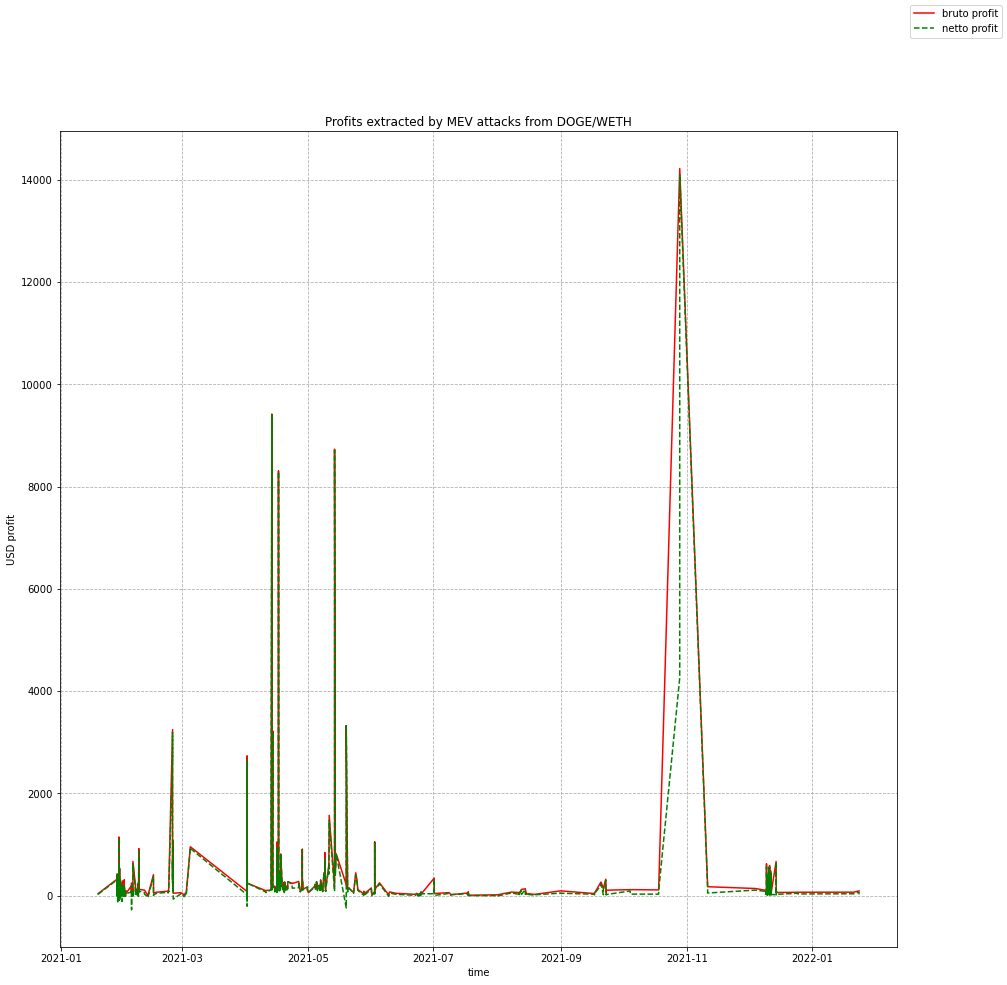

In [123]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(doge_weth_possible_mevs_df.timestamp, doge_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(doge_weth_possible_mevs_df.timestamp, doge_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from DOGE/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [124]:
print("max bruto profit in USD = " +
      str(doge_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 14218.179539464163


In [125]:
print("min bruto profit in USD = " +
      str(doge_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.1070099824402759


In [126]:
print("max netto profit in USD = " +
      str(doge_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 14098.124111069206


In [127]:
print("min netto profit in USD = " +
      str(doge_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -275.0006432578663


In [128]:
print("amount of zero bruto profit possible attacks = " +
      str(len(doge_weth_possible_mevs_df[doge_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [129]:
print("amount of losses attacks = " +
      str(len(doge_weth_possible_mevs_df[doge_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 38


In [130]:
doge_weth_possible_mevs_df[doge_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,DOGE_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_doge_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
11,DOGE,WETH,1662.694250,0.011503,14.728355,2021-01-28 04:35:38,0x6f21854a903f396efdd36c2d145af973e2efe004,0x6f21854a903f396efdd36c2d145af973e2efe004,0xe7d1c72395a7eca4f8d56ce1870599e427fd3dd98571...,62000000000,...,0.000018,11742210.0,197.0,73420.0,1330.78,6.200000e-08,0.000000e+00,2.005216,6.072329,-4.067113
14,WETH,DOGE,0.010000,1662.694250,12.803721,2021-01-28 04:35:38,0x6f21854a903f396efdd36c2d145af973e2efe004,0x6f21854a903f396efdd36c2d145af973e2efe004,0xf44a8cf053b93c2b65e49544a603be700a4e34cf6e50...,62023008256,...,0.000018,11742210.0,189.0,100331.0,1330.78,6.202301e-08,0.000000e+00,2.005216,8.301129,-6.295914
22,WETH,DOGE,2.952114,417733.160829,3821.245836,2021-01-28 05:50:37,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0xb88bc2b7d74e10eda3badec74775029ba4aae6fea0b9...,1897649605938,...,0.000018,11742559.0,0.0,58933.0,1330.78,1.897650e-06,0.000000e+00,145.172547,149.184528,-4.011981
31,WETH,DOGE,5.910000,683896.499321,7598.590783,2021-01-28 08:54:22,0x6f21854a903f396efdd36c2d145af973e2efe004,0x6f21854a903f396efdd36c2d145af973e2efe004,0xeff6aad89e83c8acced75bb39a57104c4327a29ee9e3...,483001040921,...,0.000018,11743357.0,0.0,76530.0,1330.78,4.830010e-07,0.000000e+00,46.883006,49.309317,-2.426312
43,WETH,DOGE,3.310000,338512.163464,4446.102687,2021-01-28 14:16:23,0x6f21854a903f396efdd36c2d145af973e2efe004,0x6f21854a903f396efdd36c2d145af973e2efe004,0xce7f31c7fe99fcc5e8330612caf67144bc9f637784fa...,1439546605593,...,0.000018,11744767.0,0.0,76530.0,1330.78,1.439547e-06,0.000000e+00,26.350045,146.962541,-120.612496
54,DOGE,WETH,50687.148016,1.411501,1898.062270,2021-01-29 02:09:25,0xda6b746b76fdc8424764d6981e9ef5c3b13a56af,0xda6b746b76fdc8424764d6981e9ef5c3b13a56af,0x98d95ac4e23c2dbadaf7e0bb09ca7a3f5e57faf6bfff...,120000000000,...,0.000038,11748029.0,102.0,89668.0,1379.13,1.200000e-07,0.000000e+00,11.775325,14.908438,-3.133113
55,WETH,DOGE,1.420000,50687.148016,1909.490756,2021-01-29 02:09:25,0xda6b746b76fdc8424764d6981e9ef5c3b13a56af,0xda6b746b76fdc8424764d6981e9ef5c3b13a56af,0xb925f5b20b5d66f92915c6efdb8932dfbfe9604330d5...,120000000010,...,0.000038,11748029.0,98.0,127452.0,1379.13,1.200000e-07,0.000000e+00,11.775325,21.190506,-9.415181
70,WETH,DOGE,2.610000,59263.898338,3450.720734,2021-01-29 04:01:38,0x6f21854a903f396efdd36c2d145af973e2efe004,0x6f21854a903f396efdd36c2d145af973e2efe004,0xce9b2a7196f16411572a2c9595189abd3e56917a9fd0...,333003587609,...,0.000038,11748538.0,3.0,76518.0,1379.13,3.330036e-07,0.000000e+00,31.228740,35.304165,-4.075426
71,DOGE,WETH,59263.898338,2.632539,3481.762129,2021-01-29 04:01:38,0x6f21854a903f396efdd36c2d145af973e2efe004,0x6f21854a903f396efdd36c2d145af973e2efe004,0xd21bed3a23d142db7b26688c97e3ff44ff749b2450f9...,333000000000,...,0.000038,11748538.0,8.0,73432.0,1379.13,3.330000e-07,0.000000e+00,31.228740,33.879970,-2.651230
76,WETH,DOGE,25.827495,486126.994012,33576.658244,2021-01-29 04:43:56,0x00000000cd47aa64daf64f5144b0d7885754374c,0x00000000cd47aa64daf64f5144b0d7885754374c,0x26ab8fbd38924df2363b7996b26bf3fb9ab71c687747...,15463609627208,...,0.000038,11748723.0,0.0,58933.0,1379.13,1.546361e-05,0.000000e+00,1147.439437,1262.649617,-115.210180


## SHIB/WETH

In [131]:
shib_weth_suspicious_filtered_swaps_df, shib_weth_possible_mevs_df = shib_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 1250514, filtered len = 1228862
txds = 21652
out values = 10826.0


In [132]:
shib_weth_possible_mevs_df = shib_weth_sim.calculate_attack_profit(shib_weth_possible_mevs_df)
shib_weth_possible_mevs_df = shib_weth_sim.calculate_attack_profit_by_token(shib_weth_possible_mevs_df)

In [133]:
shib_price_df = shib_weth_sim.get_daily_token_price(first_to_second=False, token_name='SHIB')
shib_price_df

,date,SHIB_price
0,2020-07-31,4.315049e-12
1,2020-08-01,2.564291e-12
2,2020-08-02,1.394975e-12
3,2020-08-03,4.103484e-13
4,2020-08-04,4.181778e-13
...,...,...
508,2022-01-23,8.848110e-09
509,2022-01-24,8.621479e-09
510,2022-01-25,8.591718e-09
511,2022-01-26,8.588864e-09


In [134]:
shib_weth_possible_mevs_df['date'] = shib_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
shib_price_df['date'] = shib_price_df['date'].dt.strftime("%Y-%m-%d")

In [135]:
shib_weth_possible_mevs_df = pd.merge(shib_weth_possible_mevs_df, weth_price_df, on='date', how='left')
shib_weth_possible_mevs_df = pd.merge(shib_weth_possible_mevs_df, shib_price_df, on='date', how='left')
shib_weth_possible_mevs_df = pd.merge(shib_weth_possible_mevs_df, meme_possible_mevs_df, on='txd', how='left')

In [136]:
shib_weth_possible_mevs_df['bruto_shib_to_weth_profit'] = shib_weth_possible_mevs_df['SHIB_profit'] * shib_weth_possible_mevs_df['SHIB_price']
shib_weth_possible_mevs_df['bruto_total_profit'] = ((shib_weth_possible_mevs_df['bruto_shib_to_weth_profit'] * shib_weth_possible_mevs_df['WETH_price']) +
                                                   (shib_weth_possible_mevs_df['WETH_profit'] * shib_weth_possible_mevs_df['WETH_price']))
shib_weth_possible_mevs_df.loc[shib_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = shib_weth_possible_mevs_df['tx_fee'].median()
shib_weth_possible_mevs_df.loc[shib_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = shib_weth_possible_mevs_df['tx_fee'].median()
shib_weth_possible_mevs_df['gas_costs_usd'] = (shib_weth_possible_mevs_df['tx_fee'] * shib_weth_possible_mevs_df['WETH_price'] *
                                              shib_weth_possible_mevs_df['gas_usage_by_tx'])
shib_weth_possible_mevs_df['netto_profit'] = shib_weth_possible_mevs_df['bruto_total_profit'] - shib_weth_possible_mevs_df['gas_costs_usd']
shib_weth_possible_mevs_df.dropna(inplace=True)

In [137]:
print(len(shib_weth_possible_mevs_df))
shib_weth_possible_mevs_df

21105


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,SHIB_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_shib_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,WETH,SHIB,9.500000e-01,9.746195e+12,331.942664,2020-07-31 20:48:42,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x28df6f5def17348bc2cc36306555a984cf6715d415c1...,43966277386,...,4.315049e-12,10569628.0,82.0,119914.0,346.81,4.396628e-08,0.000000e+00,27.283661,1.831757,25.451904
1,SHIB,WETH,9.746195e+12,1.028528e+00,344.971637,2020-07-31 20:48:42,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0xf73f2952f7bf8d6432d7094ee6ed8c437c51f722ad16...,43000000672,...,4.315049e-12,10569628.0,93.0,85256.0,346.81,4.300000e-08,0.000000e+00,27.283661,1.273713,26.009947
2,SHIB,WETH,8.980494e+12,1.025214e+00,344.462780,2020-07-31 20:50:43,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x3241df0dabe154ca35445563c3a9acaf04a4dd3fce9e...,49999999999,...,4.315049e-12,10569638.0,189.0,85256.0,346.81,5.000000e-08,0.000000e+00,26.132217,1.481062,24.651155
3,WETH,SHIB,9.500000e-01,8.980494e+12,331.926162,2020-07-31 20:50:43,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x80e3107cd58ead5c1a12c5c7acfd09e2f45741a92f10...,50280143085,...,4.315049e-12,10569638.0,135.0,119914.0,346.81,5.028014e-08,0.000000e+00,26.132217,2.094810,24.037407
4,WETH,SHIB,2.850000e+00,2.272779e+13,1034.286682,2020-07-31 20:51:31,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x66926d9b7e2b52d4fbc98797e47a1a5f1e80eaaf293c...,43070088550,...,4.315049e-12,10569642.0,144.0,90282.0,346.81,4.307009e-08,0.000000e+00,216.273421,1.351000,214.922421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22409,WETH,SHIB,7.482912e+00,8.566828e+08,18430.379832,2022-01-26 02:40:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x4b28f8a499a16542c6dee5735fe5e606828b09202393...,85260957902,...,8.588864e-09,14078654.0,0.0,87159.0,2464.13,8.526096e-08,1.084346e-07,383.812006,18.321028,365.490977
22410,WETH,SHIB,7.952549e+00,9.059319e+08,19857.408741,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x2a6b92f68c20785ddb613128bd062d2eb52606cfb661...,86434106438,...,8.588864e-09,14079274.0,0.0,86387.0,2464.13,8.643411e-08,0.000000e+00,399.532870,18.408608,381.124262
22411,SHIB,WETH,9.059319e+08,8.114605e+00,20266.443865,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x4bb2165fe5cd4fec793fbde1ca283a1d6c939f374dff...,1950449212720,...,8.588864e-09,14079274.0,2.0,77742.0,2464.13,1.950449e-06,0.000000e+00,399.532870,373.833105,25.699765
22412,SHIB,WETH,4.055738e+09,3.671157e+01,88552.707586,2022-01-26 22:16:34,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x3eb48d6fa8cc650bfb42ce99904ae51b28f4239a4709...,2409644186474,...,8.588864e-09,14083864.0,2.0,77356.0,2464.13,2.409644e-06,5.077700e-08,494.370101,459.551645,34.818456


In [138]:
shib_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [139]:
print(len(shib_weth_possible_mevs_df))
shib_weth_possible_mevs_df

20399


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,SHIB_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_shib_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,WETH,SHIB,9.500000e-01,9.746195e+12,331.942664,2020-07-31 20:48:42,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x28df6f5def17348bc2cc36306555a984cf6715d415c1...,43966277386,...,4.315049e-12,10569628.0,82.0,119914.0,346.81,4.396628e-08,0.000000e+00,27.283661,1.831757,25.451904
1,SHIB,WETH,9.746195e+12,1.028528e+00,344.971637,2020-07-31 20:48:42,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0xf73f2952f7bf8d6432d7094ee6ed8c437c51f722ad16...,43000000672,...,4.315049e-12,10569628.0,93.0,85256.0,346.81,4.300000e-08,0.000000e+00,27.283661,1.273713,26.009947
2,SHIB,WETH,8.980494e+12,1.025214e+00,344.462780,2020-07-31 20:50:43,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x3241df0dabe154ca35445563c3a9acaf04a4dd3fce9e...,49999999999,...,4.315049e-12,10569638.0,189.0,85256.0,346.81,5.000000e-08,0.000000e+00,26.132217,1.481062,24.651155
3,WETH,SHIB,9.500000e-01,8.980494e+12,331.926162,2020-07-31 20:50:43,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x80e3107cd58ead5c1a12c5c7acfd09e2f45741a92f10...,50280143085,...,4.315049e-12,10569638.0,135.0,119914.0,346.81,5.028014e-08,0.000000e+00,26.132217,2.094810,24.037407
4,WETH,SHIB,2.850000e+00,2.272779e+13,1034.286682,2020-07-31 20:51:31,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x42d0ba0223700dea8bca7983cc4bf0e000dee772,0x66926d9b7e2b52d4fbc98797e47a1a5f1e80eaaf293c...,43070088550,...,4.315049e-12,10569642.0,144.0,90282.0,346.81,4.307009e-08,0.000000e+00,216.273421,1.351000,214.922421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22409,WETH,SHIB,7.482912e+00,8.566828e+08,18430.379832,2022-01-26 02:40:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x4b28f8a499a16542c6dee5735fe5e606828b09202393...,85260957902,...,8.588864e-09,14078654.0,0.0,87159.0,2464.13,8.526096e-08,1.084346e-07,383.812006,18.321028,365.490977
22410,WETH,SHIB,7.952549e+00,9.059319e+08,19857.408741,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x2a6b92f68c20785ddb613128bd062d2eb52606cfb661...,86434106438,...,8.588864e-09,14079274.0,0.0,86387.0,2464.13,8.643411e-08,0.000000e+00,399.532870,18.408608,381.124262
22411,SHIB,WETH,9.059319e+08,8.114605e+00,20266.443865,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x4bb2165fe5cd4fec793fbde1ca283a1d6c939f374dff...,1950449212720,...,8.588864e-09,14079274.0,2.0,77742.0,2464.13,1.950449e-06,0.000000e+00,399.532870,373.833105,25.699765
22412,SHIB,WETH,4.055738e+09,3.671157e+01,88552.707586,2022-01-26 22:16:34,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x3eb48d6fa8cc650bfb42ce99904ae51b28f4239a4709...,2409644186474,...,8.588864e-09,14083864.0,2.0,77356.0,2464.13,2.409644e-06,5.077700e-08,494.370101,459.551645,34.818456


In [140]:
shib_weth_count_df = shib_weth_possible_mevs_df.value_counts(subset=['timestamp'])
shib_weth_count_df[shib_weth_count_df.values > 2]

timestamp          
2021-05-08 08:51:30    8
2021-05-01 01:08:25    6
2021-04-16 21:51:41    6
2021-05-08 23:33:45    6
2021-06-04 02:01:06    6
                      ..
2021-04-17 09:15:21    4
2021-04-19 13:51:30    4
2021-04-20 19:24:32    4
2021-04-21 02:00:07    4
2021-05-09 04:00:10    4
Length: 145, dtype: int64

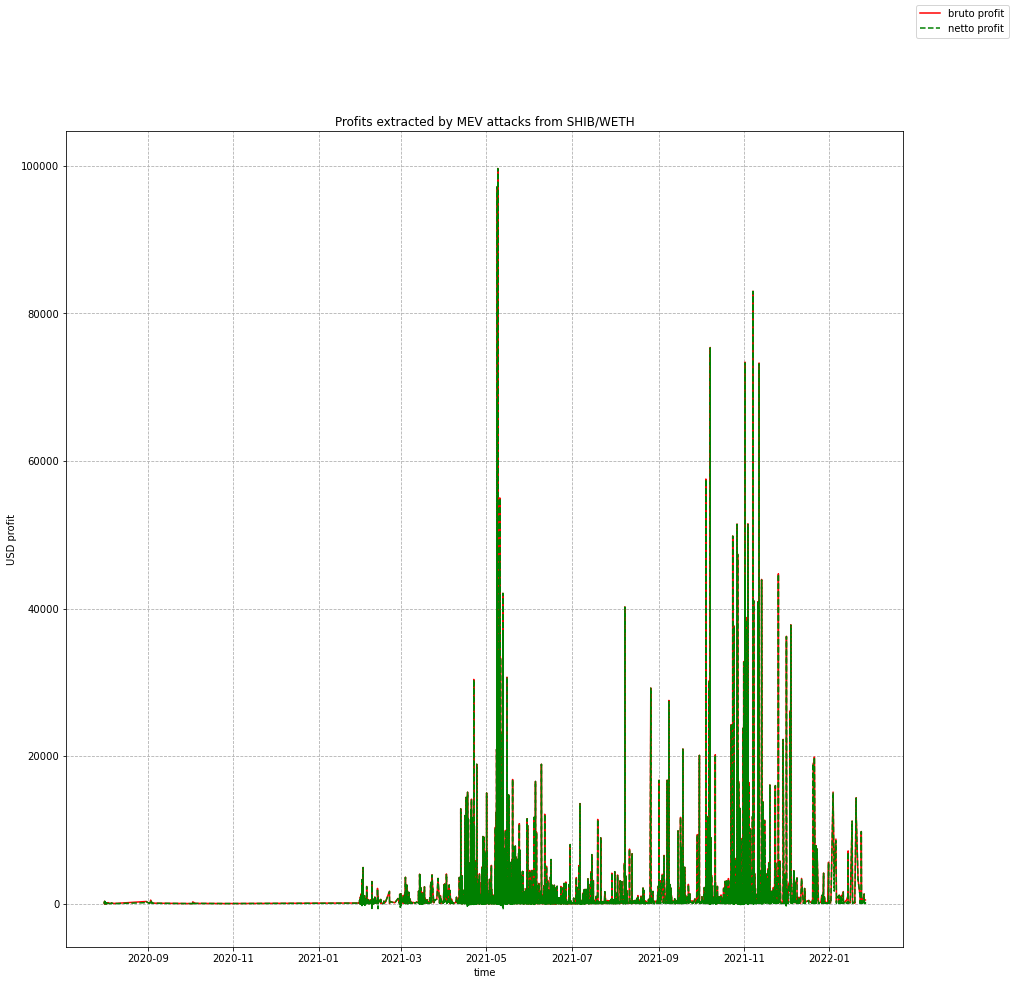

In [141]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(shib_weth_possible_mevs_df.timestamp, shib_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(shib_weth_possible_mevs_df.timestamp, shib_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from SHIB/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [142]:
print("max bruto profit in USD = " +
      str(shib_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 99662.74697103567


In [143]:
print("min bruto profit in USD = " +
      str(shib_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 1.038958090651924e-06


In [144]:
print("max netto profit in USD = " +
      str(shib_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 99645.36640892505


In [145]:
print("min netto profit in USD = " +
      str(shib_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -832.4580865349059


In [146]:
print("amount of zero bruto profit possible attacks = " +
      str(len(shib_weth_possible_mevs_df[shib_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [147]:
print("amount of losses attacks = " +
      str(len(shib_weth_possible_mevs_df[shib_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 880


In [148]:
shib_weth_possible_mevs_df[shib_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,SHIB_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_shib_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
42,WETH,SHIB,2.000000e+00,1.271364e+12,689.725280,2020-07-31 22:59:42,0x284900d5ab66356fbf936a0469ab0e138f965114,0x284900d5ab66356fbf936a0469ab0e138f965114,0x6493227a303b597205c3d730224c64c59f75c3e0d5f6...,458771695328,...,4.315049e-12,10570231.0,0.0,127387.0,346.81,4.587717e-07,0.000000,1.590911,20.304860,-18.713949
59,WETH,SHIB,1.936681e+00,1.045893e+12,669.174552,2020-07-31 23:31:07,0xdf1bac82673d6b9a18d9c476fd90bbecf00fce5d,0xdf1bac82673d6b9a18d9c476fd90bbecf00fce5d,0x90aa02acfb9514ac60feefdf08dab10bba0a0d44950f...,1571505379055,...,4.315049e-12,10570358.0,6.0,102615.0,346.81,1.571505e-06,0.000000,54.150290,56.027984,-1.877695
66,WETH,SHIB,1.764939e+00,7.319787e+11,609.493188,2020-07-31 23:39:27,0x284900d5ab66356fbf936a0469ab0e138f965114,0x284900d5ab66356fbf936a0469ab0e138f965114,0x2d49012f8de1d41e81955e201d7d6d15c67e4a063279...,212682559403,...,4.315049e-12,10570396.0,0.0,127399.0,346.81,2.126826e-07,0.000000,3.380750,9.414043,-6.033293
83,WETH,SHIB,1.997561e+00,3.418536e+11,687.675585,2020-08-01 00:26:49,0xdf1bac82673d6b9a18d9c476fd90bbecf00fce5d,0xdf1bac82673d6b9a18d9c476fd90bbecf00fce5d,0xa940df268de725e6729b43786f44eb5ad39db6eef349...,301500196852,...,2.564291e-12,10570604.0,0.0,102615.0,387.41,3.015002e-07,0.000000,10.567620,11.968195,-1.400576
90,WETH,SHIB,5.000000e+00,7.464438e+11,1727.072283,2020-08-01 00:40:06,0x284900d5ab66356fbf936a0469ab0e138f965114,0x284900d5ab66356fbf936a0469ab0e138f965114,0xd26bdc13c44f1148f40eb830a287f8d05d266bcffe16...,1348949373276,...,2.564291e-12,10570663.0,1.0,112977.0,387.41,1.348949e-06,0.000000,29.030738,58.954357,-29.923620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21913,WETH,SHIB,2.800534e-01,2.302225e+07,1182.665724,2021-11-19 15:35:07,0x11111112542d85b3ef69ae05771c2dccff4faa26,0x4821360dedb4cdfdaa467bcb86ea52f4abf3496a,0x97401a7f80a6dbb659b00339b62eceab7ece28d117e4...,151427002768,...,1.127130e-08,13646358.0,117.0,113037.0,4299.27,1.514270e-07,0.000016,7.335838,73.414321,-66.078483
22006,SHIB,WETH,1.718466e+07,1.588547e-01,647.016992,2021-11-28 13:42:43,0x1111111254fb6c44bac0bed2854e76f90643097d,0x1111111254fb6c44bac0bed2854e76f90643097d,0x4c95bcc933372385b1ae1500554646095db1b0ca8fa8...,76854710227,...,9.093637e-09,13702701.0,109.0,167489.0,4297.92,7.685471e-08,0.006032,48.264098,55.257424,-6.993325
22007,WETH,SHIB,1.536437e-01,1.652131e+07,625.792895,2021-11-28 13:42:43,0x1111111254fb6c44bac0bed2854e76f90643097d,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xa6e5ee2adf51284749b5e2dd5f759c753976a05bf163...,76854710227,...,9.093637e-09,13702701.0,72.0,161776.0,4297.92,7.685471e-08,0.006032,48.264098,53.372609,-5.108511
22050,SHIB,WETH,2.404198e+07,2.302386e-01,1092.271974,2021-12-01 07:15:58,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc352e35a7e5364e53073b4670d5f622438774a41,0x1d7af2bce4afe704e231bc78689cdeff6fb8d71c4848...,118396699146,...,9.619324e-09,13719724.0,358.0,169820.0,4580.57,1.183967e-07,0.004252,32.617653,92.089190,-59.471537


## ELON/WETH

In [149]:
elon_weth_suspicious_filtered_swaps_df, elon_weth_possible_mevs_df = elon_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 338998, filtered len = 329496
txds = 9502
out values = 4751.0


In [150]:
elon_weth_possible_mevs_df = elon_weth_sim.calculate_attack_profit(elon_weth_possible_mevs_df)
elon_weth_possible_mevs_df = elon_weth_sim.calculate_attack_profit_by_token(elon_weth_possible_mevs_df)

In [151]:
elon_price_df = elon_weth_sim.get_daily_token_price(first_to_second=False, token_name='ELON')
elon_price_df

,date,ELON_price
0,2021-04-23,1.960285e-11
1,2021-04-24,4.513429e-11
2,2021-04-25,3.180003e-11
3,2021-04-26,4.524601e-11
4,2021-04-27,9.061832e-11
...,...,...
275,2022-01-23,3.364543e-10
276,2022-01-24,3.154148e-10
277,2022-01-25,3.108672e-10
278,2022-01-26,3.502436e-10


In [152]:
elon_weth_possible_mevs_df['date'] = elon_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
elon_price_df['date'] = elon_price_df['date'].dt.strftime("%Y-%m-%d")

In [153]:
elon_weth_possible_mevs_df = pd.merge(elon_weth_possible_mevs_df, weth_price_df, on='date', how='left')
elon_weth_possible_mevs_df = pd.merge(elon_weth_possible_mevs_df, elon_price_df, on='date', how='left')
elon_weth_possible_mevs_df = pd.merge(elon_weth_possible_mevs_df, meme_possible_mevs_df, on='txd', how='left')

In [154]:
elon_weth_possible_mevs_df['bruto_elon_to_weth_profit'] = elon_weth_possible_mevs_df['ELON_profit'] * elon_weth_possible_mevs_df['ELON_price']
elon_weth_possible_mevs_df['bruto_total_profit'] = ((elon_weth_possible_mevs_df['bruto_elon_to_weth_profit'] * elon_weth_possible_mevs_df['WETH_price']) +
                                                   (elon_weth_possible_mevs_df['WETH_profit'] * elon_weth_possible_mevs_df['WETH_price']))
elon_weth_possible_mevs_df.loc[elon_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = elon_weth_possible_mevs_df['tx_fee'].median()
elon_weth_possible_mevs_df.loc[elon_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = elon_weth_possible_mevs_df['tx_fee'].median()
elon_weth_possible_mevs_df['gas_costs_usd'] = (elon_weth_possible_mevs_df['tx_fee'] * elon_weth_possible_mevs_df['WETH_price'] *
                                              elon_weth_possible_mevs_df['gas_usage_by_tx'])
elon_weth_possible_mevs_df['netto_profit'] = elon_weth_possible_mevs_df['bruto_total_profit'] - elon_weth_possible_mevs_df['gas_costs_usd']
elon_weth_possible_mevs_df.dropna(inplace=True)

In [155]:
print(len(elon_weth_possible_mevs_df))
elon_weth_possible_mevs_df

9390


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,ELON_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_elon_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,WETH,ELON,8.659269e+00,8.875907e+13,22731.628092,2021-04-23 01:10:31,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x9c9dd91ce26a033f9ed9df34ceac9c457ba0b7715d52...,0,...,1.960285e-11,12293438.0,0.0,98942.0,2369.67,6.500000e-08,0.0,5527.207766,15.247244,5511.960522
1,ELON,WETH,8.875907e+13,1.099062e+01,23527.395943,2021-04-23 01:10:31,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0xc5b16f2c3989dcc07ed662402f03211d3587fa299264...,0,...,1.960285e-11,12293438.0,2.0,62726.0,2369.67,6.500000e-08,0.0,5527.207766,9.666255,5517.541511
2,ELON,WETH,2.168125e+13,2.653980e+00,6140.360594,2021-04-23 01:11:04,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x154068d605ac2977aa1e1499f90de0df35d99667f8e6...,0,...,1.960285e-11,12293441.0,2.0,62736.0,2369.67,6.500000e-08,0.0,895.351895,9.667796,885.684099
3,WETH,ELON,2.276324e+00,2.168125e+13,5529.035103,2021-04-23 01:11:04,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x7abc028f0cee5e81af0b53fdefddb5d84e92d817acb6...,0,...,1.960285e-11,12293441.0,0.0,63451.0,2369.67,6.500000e-08,0.0,895.351895,9.777980,885.573915
4,ELON,WETH,1.958870e+13,2.733104e+00,6328.673911,2021-04-23 01:12:05,0x575c3a99429352eda66661fc3857b9f83f58a73f,0x575c3a99429352eda66661fc3857b9f83f58a73f,0x66b1fc472b2300e37e34a8afd95a1f6824e18a299eeb...,0,...,1.960285e-11,12293444.0,2.0,106753.0,2369.67,6.500000e-08,0.0,645.259659,16.450942,628.808717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,ELON,WETH,1.400000e+10,4.718194e+00,11779.865429,2022-01-24 01:13:46,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xb96d85cbc47dcedffa455324f50ddd7c1f37d6387ecb...,106604035664,...,3.154148e-10,14065339.0,0.0,88290.0,2442.27,1.066040e-07,0.0,103.977243,22.965622,81.011621
9922,ELON,WETH,1.400000e+10,4.463777e+00,10656.932244,2022-01-24 08:03:14,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x110970a3a63f12fd137af279b6591598568500718ecb...,122411998487,...,3.154148e-10,14067135.0,4.0,88290.0,2442.27,1.224120e-07,0.0,124.853573,26.371119,98.482454
9923,WETH,ELON,4.412608e+00,1.400000e+10,10534.769834,2022-01-24 08:03:14,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x8400486016bf27d1c19442ae155bd8815dfd2d4c5e72...,399615548845,...,3.154148e-10,14067135.0,6.0,77855.0,2442.27,3.996155e-07,0.0,124.853573,75.914012,48.939561
9924,ELON,WETH,8.120138e+10,2.592464e+01,62557.979112,2022-01-25 09:37:46,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x538b4fc7ee76c1a990cdb91286c07b10be2f6f23f421...,77553779087,...,3.108672e-10,14074004.0,6.0,77446.0,2459.65,7.755378e-08,0.0,28.767117,14.785340,13.981777


In [156]:
elon_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [157]:
print(len(elon_weth_possible_mevs_df))
elon_weth_possible_mevs_df

8974


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,ELON_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_elon_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,WETH,ELON,8.659269e+00,8.875907e+13,22731.628092,2021-04-23 01:10:31,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x9c9dd91ce26a033f9ed9df34ceac9c457ba0b7715d52...,0,...,1.960285e-11,12293438.0,0.0,98942.0,2369.67,6.500000e-08,0.0,5527.207766,15.247244,5511.960522
1,ELON,WETH,8.875907e+13,1.099062e+01,23527.395943,2021-04-23 01:10:31,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0xc5b16f2c3989dcc07ed662402f03211d3587fa299264...,0,...,1.960285e-11,12293438.0,2.0,62726.0,2369.67,6.500000e-08,0.0,5527.207766,9.666255,5517.541511
2,ELON,WETH,2.168125e+13,2.653980e+00,6140.360594,2021-04-23 01:11:04,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x154068d605ac2977aa1e1499f90de0df35d99667f8e6...,0,...,1.960285e-11,12293441.0,2.0,62736.0,2369.67,6.500000e-08,0.0,895.351895,9.667796,885.684099
3,WETH,ELON,2.276324e+00,2.168125e+13,5529.035103,2021-04-23 01:11:04,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x02023798e0890ddebfa4cc6d4b2b05434e940202,0x7abc028f0cee5e81af0b53fdefddb5d84e92d817acb6...,0,...,1.960285e-11,12293441.0,0.0,63451.0,2369.67,6.500000e-08,0.0,895.351895,9.777980,885.573915
4,ELON,WETH,1.958870e+13,2.733104e+00,6328.673911,2021-04-23 01:12:05,0x575c3a99429352eda66661fc3857b9f83f58a73f,0x575c3a99429352eda66661fc3857b9f83f58a73f,0x66b1fc472b2300e37e34a8afd95a1f6824e18a299eeb...,0,...,1.960285e-11,12293444.0,2.0,106753.0,2369.67,6.500000e-08,0.0,645.259659,16.450942,628.808717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,ELON,WETH,1.400000e+10,4.718194e+00,11779.865429,2022-01-24 01:13:46,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xb96d85cbc47dcedffa455324f50ddd7c1f37d6387ecb...,106604035664,...,3.154148e-10,14065339.0,0.0,88290.0,2442.27,1.066040e-07,0.0,103.977243,22.965622,81.011621
9922,ELON,WETH,1.400000e+10,4.463777e+00,10656.932244,2022-01-24 08:03:14,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x110970a3a63f12fd137af279b6591598568500718ecb...,122411998487,...,3.154148e-10,14067135.0,4.0,88290.0,2442.27,1.224120e-07,0.0,124.853573,26.371119,98.482454
9923,WETH,ELON,4.412608e+00,1.400000e+10,10534.769834,2022-01-24 08:03:14,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x8400486016bf27d1c19442ae155bd8815dfd2d4c5e72...,399615548845,...,3.154148e-10,14067135.0,6.0,77855.0,2442.27,3.996155e-07,0.0,124.853573,75.914012,48.939561
9924,ELON,WETH,8.120138e+10,2.592464e+01,62557.979112,2022-01-25 09:37:46,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x538b4fc7ee76c1a990cdb91286c07b10be2f6f23f421...,77553779087,...,3.108672e-10,14074004.0,6.0,77446.0,2459.65,7.755378e-08,0.0,28.767117,14.785340,13.981777


In [158]:
shib_weth_count_df = elon_weth_possible_mevs_df.value_counts(subset=['timestamp'])
shib_weth_count_df[shib_weth_count_df.values > 2]

timestamp          
2021-04-27 10:32:13    8
2021-04-25 18:28:18    6
2021-04-23 06:58:15    6
2021-04-23 23:37:12    6
2021-04-27 04:03:06    6
                      ..
2021-07-31 22:44:57    4
2021-04-25 17:23:43    4
2021-05-12 18:28:08    4
2021-07-31 23:05:26    4
2021-05-12 00:21:51    4
Length: 84, dtype: int64

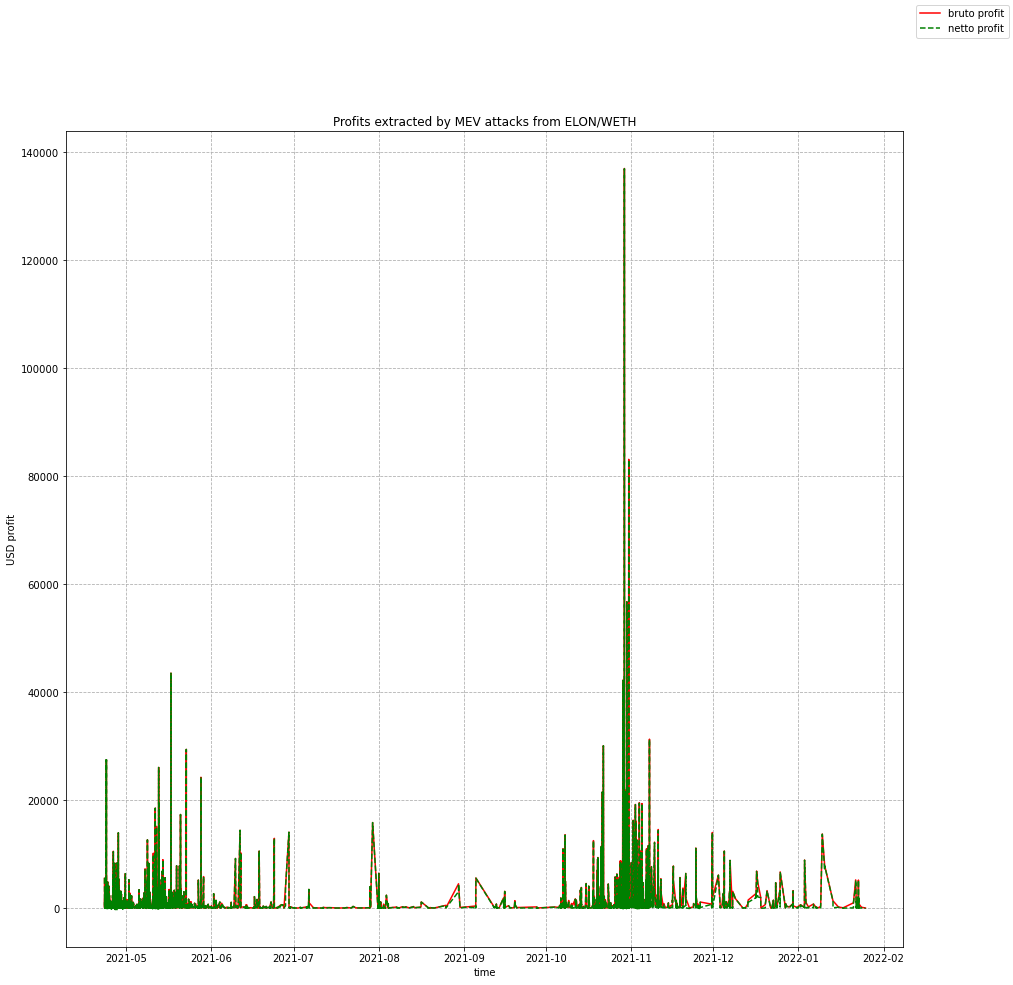

In [159]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(elon_weth_possible_mevs_df.timestamp, elon_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(elon_weth_possible_mevs_df.timestamp, elon_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from ELON/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [160]:
print("max bruto profit in USD = " +
      str(elon_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 136974.96271166854


In [161]:
print("min bruto profit in USD = " +
      str(elon_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.22399686937894575


In [162]:
print("max netto profit in USD = " +
      str(elon_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 136916.13432048194


In [163]:
print("min netto profit in USD = " +
      str(elon_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -300.19740613761496


In [164]:
print("amount of zero bruto profit possible attacks = " +
      str(len(elon_weth_possible_mevs_df[elon_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [165]:
print("amount of losses attacks = " +
      str(len(elon_weth_possible_mevs_df[elon_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 243


In [166]:
elon_weth_possible_mevs_df[elon_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,ELON_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_elon_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
148,WETH,ELON,5.030396e+00,3.345445e+11,10983.599414,2021-04-23 06:53:04,0x000000000000084e91743124a982076c59f10084,0x000000000000084e91743124a982076c59f10084,0x86c3327db881712c4eef6163a5ad9f89f971e12fb963...,322000834312,...,1.960285e-11,12294978.0,49.0,78911.0,2369.67,3.220008e-07,0.000000,7.685193,60.240957,-52.555764
150,ELON,WETH,3.345445e+11,5.027154e+00,10976.521586,2021-04-23 06:53:04,0x000000000000084e91743124a982076c59f10084,0x000000000000084e91743124a982076c59f10084,0xde46307995ecb8a0937b10b29d2ae7a15f2953c58207...,300000000000,...,1.960285e-11,12294978.0,53.0,87450.0,2369.67,3.000000e-07,0.000000,7.685193,62.198281,-54.513088
416,WETH,ELON,6.060000e+00,1.765909e+11,13788.923001,2021-04-23 11:01:04,0x9282dc5c422fa91ff2f6ff3a0b45b7bf97cf78e7,0x9282dc5c422fa91ff2f6ff3a0b45b7bf97cf78e7,0xb2a731e41a4f1a61f0258db5ac216548cfc1aa69aa3d...,300000000002,...,1.960285e-11,12296065.0,3.0,100883.0,2369.67,3.000000e-07,0.000000,28.706098,71.752421,-43.046323
417,ELON,WETH,1.765909e+11,6.047892e+00,13764.909867,2021-04-23 11:01:04,0x9282dc5c422fa91ff2f6ff3a0b45b7bf97cf78e7,0x9282dc5c422fa91ff2f6ff3a0b45b7bf97cf78e7,0xd709666b704c30ec7c3f1bf2df5f5b2d3721111218e2...,300000000000,...,1.960285e-11,12296065.0,6.0,79042.0,2369.67,3.000000e-07,0.000000,28.706098,56.218142,-27.512044
528,WETH,ELON,3.417626e+00,7.408650e+10,7731.586261,2021-04-23 12:31:46,0x9edd647d7d6eceae6bb61d7785ef66c5055a9bee,0x9edd647d7d6eceae6bb61d7785ef66c5055a9bee,0x6dd701f150409ee1ef9fc4d67b6979c95d1572826847...,120000000000,...,1.960285e-11,12296447.0,275.0,84463.0,2369.67,1.200000e-07,0.000000,23.033411,24.029518,-0.996107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,WETH,ELON,3.000000e-02,1.057951e+08,122.188030,2021-12-11 17:31:10,0x11111112542d85b3ef69ae05771c2dccff4faa26,0x60bf42bb958a6c02f28f7c481c0804aa56df20c7,0x708474724f69850f6bdafdabd8371d828ad5a2610c6d...,77598971143,...,2.839982e-10,13785208.0,51.0,102253.0,4088.68,7.759897e-08,0.003436,28.659228,32.362290,-3.703062
9787,ELON,WETH,2.736907e+08,7.579350e-02,295.124712,2021-12-18 07:15:54,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x63b61e73d3fa1fb96d51ce457cabe89fffa7a1f1,0x9acbcf095200067e8867ba8385ec3ee64c942e9ce9cd...,44647527818,...,2.709464e-10,13827691.0,100.0,342361.0,3961.96,4.464753e-08,0.003647,31.152940,60.636178,-29.483238
9792,ELON,WETH,4.283605e+08,1.220619e-01,489.642206,2021-12-21 21:08:41,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xb767c20d9773adce84d0f0a5bc64e2f114ad3076,0x2e1fab55e0af261b5a05b723594eb9c431669baf5299...,67315968789,...,2.915409e-10,13850906.0,203.0,169519.0,4017.70,6.731597e-08,0.001645,16.117045,46.004264,-29.887219
9793,WETH,ELON,1.244149e-01,4.340024e+08,499.076804,2021-12-21 21:08:41,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x6b1c26935f3f4e56ed9f0d5a522b526803805651,0xdedabe71325578d158afdad45a3bc22c3bc2bc491482...,67405968789,...,2.915409e-10,13850906.0,173.0,232092.0,4017.70,6.740597e-08,0.001645,16.117045,63.069608,-46.952563


## SQUID/WETH

This pool contains no MEV attacks. There are neither attacks with exact values match nor attacks with small difference in attack values

In [167]:
squid_weth_suspicious_filtered_swaps_df, squid_weth_possible_mevs_df = squid_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 180, filtered len = 180
txds = 0
out values = 0.0


# Collecting all MEV attacks into one big history and saving it locally

In [168]:
chosen_columns = ['timestamp', 'sender', 'to', 'txd', 'block', 'block_position', 'bruto_total_profit',
                  'tx_fee', 'gas_costs_usd', 'netto_profit']

# nft pools
axs_weth_profits_df = axs_weth_possible_mevs_df[chosen_columns]
mana_weth_profits_df = mana_weth_possible_mevs_df[chosen_columns]
enj_weth_profits_df = enj_weth_possible_mevs_df[chosen_columns]
sand_weth_profits_df = sand_weth_possible_mevs_df[chosen_columns]
alice_weth_profits_df = alice_weth_possible_mevs_df[chosen_columns]

# meme pools
doge_weth_profits_df = doge_weth_possible_mevs_df[chosen_columns]
shib_weth_profits_df = shib_weth_possible_mevs_df[chosen_columns]
elon_weth_profits_df = elon_weth_possible_mevs_df[chosen_columns]

axs_weth_profits_df['pool_name'] = 'AXS/WETH'
mana_weth_profits_df['pool_name'] = 'MANA/WETH'
enj_weth_profits_df['pool_name'] = 'ENJ/WETH'
sand_weth_profits_df['pool_name'] = 'SAND/WETH'
alice_weth_profits_df['pool_name'] = 'ALICE/WETH'
doge_weth_profits_df['pool_name'] = 'DOGE/WETH'
shib_weth_profits_df['pool_name'] = 'SHIB/WETH'
elon_weth_profits_df['pool_name'] = 'ELON/WETH'

nft_meme_profits_list = [axs_weth_profits_df, mana_weth_profits_df, enj_weth_profits_df,
                            sand_weth_profits_df, alice_weth_profits_df, doge_weth_profits_df,
                            shib_weth_profits_df, elon_weth_profits_df]
nft_meme_profits_df = pd.concat(nft_meme_profits_list)
nft_meme_profits_df

<ipython-input-168-b1d05ae8eb84>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axs_weth_profits_df['pool_name'] = 'AXS/WETH'
<ipython-input-168-b1d05ae8eb84>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mana_weth_profits_df['pool_name'] = 'MANA/WETH'
<ipython-input-168-b1d05ae8eb84>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit,pool_name
0,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0x5d4442d9c71e5d513d2fa1a282cae3221a9f0249cec6...,12358321.0,6.0,539.671873,1.000000e-09,0.260880,539.410993,AXS/WETH
1,2021-05-03 01:42:48,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0xfdbe038eb39530db99d68b67279c5f6b809b989fad5d...,12358321.0,3.0,539.671873,1.000000e-09,0.398313,539.273560,AXS/WETH
2,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0x89cded15c7e0656a6aa6c54d6abb6a09ff0e0199d92f...,12358324.0,45.0,94.155426,4.000000e-08,17.428644,76.726782,AXS/WETH
3,2021-05-03 01:43:46,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xcbdb50f7f1359d46a11ddcdfd0e5297d65e481fcb5a9...,12358324.0,47.0,94.155426,4.000000e-08,10.804926,83.350500,AXS/WETH
4,2021-05-03 01:46:13,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0xda1faeb056a2f568b138ca0ad9ad8a51915ba336,0x9bf4cc76bd1430243216909b4b8c1952374115a9e202...,12358334.0,29.0,188.450122,3.300000e-08,8.914064,179.536057,AXS/WETH
...,...,...,...,...,...,...,...,...,...,...,...
9921,2022-01-24 01:13:46,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xb96d85cbc47dcedffa455324f50ddd7c1f37d6387ecb...,14065339.0,0.0,103.977243,1.066040e-07,22.965622,81.011621,ELON/WETH
9922,2022-01-24 08:03:14,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x110970a3a63f12fd137af279b6591598568500718ecb...,14067135.0,4.0,124.853573,1.224120e-07,26.371119,98.482454,ELON/WETH
9923,2022-01-24 08:03:14,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x8400486016bf27d1c19442ae155bd8815dfd2d4c5e72...,14067135.0,6.0,124.853573,3.996155e-07,75.914012,48.939561,ELON/WETH
9924,2022-01-25 09:37:46,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x538b4fc7ee76c1a990cdb91286c07b10be2f6f23f421...,14074004.0,6.0,28.767117,7.755378e-08,14.785340,13.981777,ELON/WETH


In [169]:
nft_meme_profits_df.sort_values(by=['timestamp', 'block_position'], inplace=True)
nft_meme_profits_df = nft_meme_profits_df.reset_index()
nft_meme_profits_df.drop(columns=['index'])

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit,pool_name
0,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...,10224660.0,175.0,0.822650,4.017321e-08,1.235373,-0.412722,ENJ/WETH
1,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x76e6f84c717415f830511897756521926b8a78679c71...,10224660.0,188.0,0.822650,4.017321e-08,0.978427,-0.155777,ENJ/WETH
2,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x1ebb936de7f819bf3b0addc58718070d0411568f148a...,10260039.0,144.0,0.346391,1.200000e-08,0.357952,-0.011561,ENJ/WETH
3,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xfa237d678d5e18bdb02a6137f4efb5ba9d95b0a60673...,10260039.0,145.0,0.346391,1.710000e-08,0.403990,-0.057599,ENJ/WETH
4,2020-06-24 18:06:50,0xeca2e07abc83c78a7178c46b84962af86de342ff,0xeca2e07abc83c78a7178c46b84962af86de342ff,0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...,10330038.0,4.0,4.298381,7.250000e-08,1.670445,2.627936,ENJ/WETH
...,...,...,...,...,...,...,...,...,...,...,...
34572,2022-01-26 02:40:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x2ff8baf925304ee7f407fc081ecad244e1fb1de65361...,14078654.0,2.0,383.812006,1.895807e-06,361.555962,22.256044,SHIB/WETH
34573,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x2a6b92f68c20785ddb613128bd062d2eb52606cfb661...,14079274.0,0.0,399.532870,8.643411e-08,18.408608,381.124262,SHIB/WETH
34574,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x4bb2165fe5cd4fec793fbde1ca283a1d6c939f374dff...,14079274.0,2.0,399.532870,1.950449e-06,373.833105,25.699765,SHIB/WETH
34575,2022-01-26 22:16:34,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x57210053821ded520adcf0335ded21d41ce380f5551d...,14083864.0,0.0,494.370101,1.418135e-07,30.473144,463.896957,SHIB/WETH


In most of the cases there are sandwiches with two attacks present in one block and there are some unique cases of sandwiches with 4 transactions present in one block, 6 transactions and 8 transactions:

* 373 blocks/timestamps with double sandwiches;
* 13 blocks/timestamps with triple sandwiches;
* 2 blocks/timestamps with quadro sandwiches

In [170]:
grouped_nft_meme_profits_df = nft_meme_profits_df.value_counts(subset=['timestamp'])
grouped_nft_meme_profits_df[grouped_nft_meme_profits_df.values > 2]

timestamp          
2021-04-27 10:32:13    8
2021-05-08 08:51:30    8
2021-04-16 21:51:41    6
2021-05-08 23:33:45    6
2021-04-23 12:56:49    6
                      ..
2021-02-02 00:13:04    4
2021-04-25 17:08:15    4
2021-01-31 16:38:41    4
2021-10-06 23:27:11    4
2020-08-09 02:14:40    4
Length: 342, dtype: int64

In [171]:
nft_meme_profits_df.drop(columns=['index'], inplace=True)

In [172]:
nft_meme_profits_df[nft_meme_profits_df['timestamp'] == datetime.fromisoformat("2021-05-08 08:51:30")]

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit,pool_name
15432,2021-05-08 08:51:30,0x00000000000003441d59dde9a90bffb1cd3fabf1,0x00000000000003441d59dde9a90bffb1cd3fabf1,0xf96849d0d6636570b189464bb26bcbe7959800c1b338...,12392662.0,3.0,1585.896078,2.914163e-07,63.943641,1521.952437,SHIB/WETH
15433,2021-05-08 08:51:30,0xcff2d6bf21e6835a144ef668809adec4b4e9c395,0xcff2d6bf21e6835a144ef668809adec4b4e9c395,0x9e459e859787397043f8c7f1c235ffb5366f48f6df2f...,12392662.0,4.0,691.073797,2.809937e-07,55.637975,635.435823,SHIB/WETH
15434,2021-05-08 08:51:30,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x8eeb46fab68849fcc6f19b5f0cec11203639d3e38cdd...,12392662.0,5.0,3799.254420,2.646592e-07,84.322413,3714.932007,SHIB/WETH
15435,2021-05-08 08:51:30,0xcff2d6bf21e6835a144ef668809adec4b4e9c395,0xcff2d6bf21e6835a144ef668809adec4b4e9c395,0x938c17349fe6e03211bc41f1c2858f59d26584055847...,12392662.0,7.0,691.073797,2.220000e-07,69.496134,621.577663,SHIB/WETH
15436,2021-05-08 08:51:30,0xe3c77b264c224ab4702584a0686c0ada6a83894a,0xe3c77b264c224ab4702584a0686c0ada6a83894a,0x4e22bd1880a3f0559ff5a432f04d167b87e652b5c01a...,12392662.0,120.0,987.768357,1.200000e-07,24.203906,963.564452,SHIB/WETH
15437,2021-05-08 08:51:30,0xe3c77b264c224ab4702584a0686c0ada6a83894a,0xe3c77b264c224ab4702584a0686c0ada6a83894a,0xe14e71f18b2f34986da2601bb8c4d96651417ad39bdf...,12392662.0,126.0,987.768357,1.200000e-07,29.437829,958.330529,SHIB/WETH
15438,2021-05-08 08:51:30,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x2f12b2310c55489d87d23e72f13f3dd5a86fcff5f511...,12392662.0,250.0,3799.254420,1.001000e-07,32.109208,3767.145212,SHIB/WETH
15439,2021-05-08 08:51:30,0x00000000000003441d59dde9a90bffb1cd3fabf1,0x00000000000003441d59dde9a90bffb1cd3fabf1,0x43fb2684e332c7fe2b33cb91d683f7721bb37d0806fc...,12392662.0,256.0,1585.896078,1.001000e-07,33.183595,1552.712483,SHIB/WETH


In [173]:
nft_meme_profits_df[nft_meme_profits_df['timestamp'] == datetime.fromisoformat("2021-04-27 10:32:13")]

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit,pool_name
11796,2021-04-27 10:32:13,0xd59e5b41482ee6283c22e1a6a20756da512ffa97,0xd59e5b41482ee6283c22e1a6a20756da512ffa97,0x5140732b37e674d4d7307d357ae655e43215a0de7615...,12321881.0,0.0,464.572305,6.500000e-08,25.491493,439.080812,ELON/WETH
11797,2021-04-27 10:32:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x93f12ee06c91e8b9f53eb2388723acbcef199e70,0xb4e898282e0c4fce297652e1caa5f2372ead65cb2602...,12321881.0,1.0,5537.151817,5.600000e-08,17.248623,5519.903193,ELON/WETH
11798,2021-04-27 10:32:13,0xd59e5b41482ee6283c22e1a6a20756da512ffa97,0xd59e5b41482ee6283c22e1a6a20756da512ffa97,0x0555a9d98bb83d476db8f100c10d8ea18fc6f6790161...,12321881.0,2.0,464.572305,6.500000e-08,16.776072,447.796233,ELON/WETH
11799,2021-04-27 10:32:13,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0xb1034413eb10458ba23550fac3fed9e51071fafac158...,12321881.0,24.0,2196.926106,7.273685e-08,15.717149,2181.208957,ELON/WETH
11800,2021-04-27 10:32:13,0x00000000000003441d59dde9a90bffb1cd3fabf1,0x00000000000003441d59dde9a90bffb1cd3fabf1,0x2dbdfda8918e11af300bd438c916fee3a41e0730de0f...,12321881.0,29.0,251.470747,6.636297e-08,14.494950,236.975798,ELON/WETH
11801,2021-04-27 10:32:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0x5394589373be9a5a3a6a573e46bb994448d91fa59fef...,12321881.0,102.0,5537.151817,4.950000e-08,20.029695,5517.122122,ELON/WETH
11802,2021-04-27 10:32:13,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x3dad8cf200799f82fd8eb68f608220d8f3ebf8de,0x1f0ab28ee6cb557c978677da52bb2a92f07ab1e25f35...,12321881.0,103.0,2196.926106,4.950000e-08,10.741873,2186.184233,ELON/WETH
11803,2021-04-27 10:32:13,0x00000000000003441d59dde9a90bffb1cd3fabf1,0x00000000000003441d59dde9a90bffb1cd3fabf1,0xd78d3fd908c33692760485dafef7d072cc0b49506ffb...,12321881.0,105.0,251.470747,4.950000e-08,11.101931,240.368816,ELON/WETH


In [174]:
print("amount of blocks/timestamps with double sandwiches = " +
      str(len(grouped_nft_meme_profits_df[grouped_nft_meme_profits_df.values == 4])))

amount of blocks/timestamps with double sandwiches = 327


In [175]:
print("amount of blocks/timestamps with triple sandwiches = " +
      str(len(grouped_nft_meme_profits_df[grouped_nft_meme_profits_df.values == 6])))

amount of blocks/timestamps with triple sandwiches = 13


In [176]:
print("amount of blocks/timestamps with quadro sandwiches = " +
      str(len(grouped_nft_meme_profits_df[grouped_nft_meme_profits_df.values == 8])))

amount of blocks/timestamps with quadro sandwiches = 2


In [177]:
grouped_by_timestamps_nft_meme_profits_df = nft_meme_profits_df.groupby(by=['timestamp']).sum()
grouped_by_timestamps_nft_meme_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_by_timestamps_nft_meme_profits_df['block'] = grouped_by_timestamps_nft_meme_profits_df['block'] / 2
grouped_by_timestamps_nft_meme_profits_df['bruto_total_profit'] = grouped_by_timestamps_nft_meme_profits_df['bruto_total_profit'] / 2
grouped_by_timestamps_nft_meme_profits_df['netto_profit'] = grouped_by_timestamps_nft_meme_profits_df['bruto_total_profit'] - grouped_by_timestamps_nft_meme_profits_df['gas_costs_usd']
grouped_by_timestamps_nft_meme_profits_df.reset_index(inplace=True)
grouped_by_timestamps_nft_meme_profits_df

,timestamp,block,bruto_total_profit,gas_costs_usd,netto_profit
0,2020-06-08 10:50:08,10224660.0,0.822650,2.213800,-1.391150
1,2020-06-13 22:20:16,10260039.0,0.346391,0.761942,-0.415551
2,2020-06-24 18:06:50,10330038.0,4.298381,2.790211,1.508170
3,2020-06-29 12:37:46,10360783.0,1.286191,2.572013,-1.285822
4,2020-07-04 15:02:53,10393649.0,26.101166,6.970685,19.130481
...,...,...,...,...,...
16925,2022-01-25 09:37:46,14074004.0,28.767117,28.733032,0.034085
16926,2022-01-26 01:17:54,14078272.0,1319.560138,1313.499200,6.060938
16927,2022-01-26 02:40:45,14078654.0,383.812006,379.876990,3.935016
16928,2022-01-26 05:05:26,14079274.0,399.532870,392.241713,7.291157


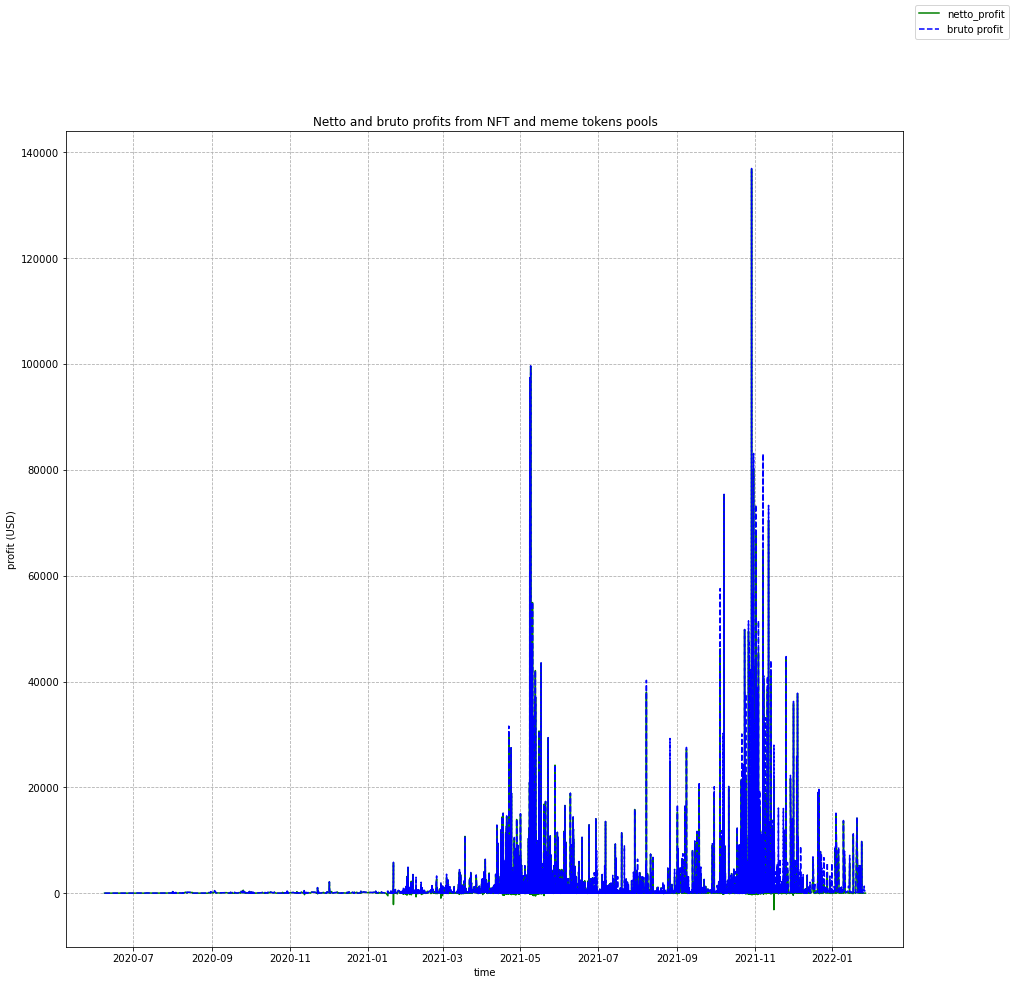

In [178]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(grouped_by_timestamps_nft_meme_profits_df.timestamp, grouped_by_timestamps_nft_meme_profits_df.netto_profit, label='netto_profit', color='g')
ax.plot(grouped_by_timestamps_nft_meme_profits_df.timestamp, grouped_by_timestamps_nft_meme_profits_df.bruto_total_profit, color='b', linestyle='--', label='bruto profit')
ax.set_xlabel('time')
ax.set_ylabel('profit (USD)')
ax.grid(True, linestyle='--')
ax.set_title('Netto and bruto profits from NFT and meme tokens pools')
fig.legend()
plt.show()

In [179]:
grouped_nft_meme_profits_df[grouped_nft_meme_profits_df.values < 2]

timestamp          
2021-06-23 05:00:45    1
dtype: int64

In [180]:
nft_meme_profits_df[nft_meme_profits_df['timestamp'] == datetime.fromisoformat("2021-06-23 05:00:45")]

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit,pool_name
25404,2021-06-23 05:00:45,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x52d7df6a6df61a8270050db2722c87b75b286b2fb31c...,12688472.0,189.0,16.673715,1.200000e-08,2.791451,13.882263,SHIB/WETH


In [181]:
nft_meme_profits_df.drop(nft_meme_profits_df.index[[29822]], inplace=True)
nft_meme_profits_df

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_costs_usd,netto_profit,pool_name
0,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xe2acd67928335b70a4d2cc89d7d871235070ddedba36...,10224660.0,175.0,0.822650,4.017321e-08,1.235373,-0.412722,ENJ/WETH
1,2020-06-08 10:50:08,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x76e6f84c717415f830511897756521926b8a78679c71...,10224660.0,188.0,0.822650,4.017321e-08,0.978427,-0.155777,ENJ/WETH
2,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x1ebb936de7f819bf3b0addc58718070d0411568f148a...,10260039.0,144.0,0.346391,1.200000e-08,0.357952,-0.011561,ENJ/WETH
3,2020-06-13 22:20:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xfa237d678d5e18bdb02a6137f4efb5ba9d95b0a60673...,10260039.0,145.0,0.346391,1.710000e-08,0.403990,-0.057599,ENJ/WETH
4,2020-06-24 18:06:50,0xeca2e07abc83c78a7178c46b84962af86de342ff,0xeca2e07abc83c78a7178c46b84962af86de342ff,0x318e4daae6fb0bf639aae3461f9108c48ca61dee194d...,10330038.0,4.0,4.298381,7.250000e-08,1.670445,2.627936,ENJ/WETH
...,...,...,...,...,...,...,...,...,...,...,...
34572,2022-01-26 02:40:45,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x2ff8baf925304ee7f407fc081ecad244e1fb1de65361...,14078654.0,2.0,383.812006,1.895807e-06,361.555962,22.256044,SHIB/WETH
34573,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x2a6b92f68c20785ddb613128bd062d2eb52606cfb661...,14079274.0,0.0,399.532870,8.643411e-08,18.408608,381.124262,SHIB/WETH
34574,2022-01-26 05:05:26,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x4bb2165fe5cd4fec793fbde1ca283a1d6c939f374dff...,14079274.0,2.0,399.532870,1.950449e-06,373.833105,25.699765,SHIB/WETH
34575,2022-01-26 22:16:34,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x57210053821ded520adcf0335ded21d41ce380f5551d...,14083864.0,0.0,494.370101,1.418135e-07,30.473144,463.896957,SHIB/WETH


In [182]:
grouped_by_timestamps_nft_meme_profits_df = nft_meme_profits_df.groupby(by=['timestamp']).sum()
grouped_by_timestamps_nft_meme_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_by_timestamps_nft_meme_profits_df['block'] = grouped_by_timestamps_nft_meme_profits_df['block'] / 2
grouped_by_timestamps_nft_meme_profits_df['bruto_total_profit'] = grouped_by_timestamps_nft_meme_profits_df['bruto_total_profit'] / 2
grouped_by_timestamps_nft_meme_profits_df['netto_profit'] = grouped_by_timestamps_nft_meme_profits_df['bruto_total_profit'] - grouped_by_timestamps_nft_meme_profits_df['gas_costs_usd']
grouped_by_timestamps_nft_meme_profits_df.reset_index(inplace=True)
grouped_by_timestamps_nft_meme_profits_df

,timestamp,block,bruto_total_profit,gas_costs_usd,netto_profit
0,2020-06-08 10:50:08,10224660.0,0.822650,2.213800,-1.391150
1,2020-06-13 22:20:16,10260039.0,0.346391,0.761942,-0.415551
2,2020-06-24 18:06:50,10330038.0,4.298381,2.790211,1.508170
3,2020-06-29 12:37:46,10360783.0,1.286191,2.572013,-1.285822
4,2020-07-04 15:02:53,10393649.0,26.101166,6.970685,19.130481
...,...,...,...,...,...
16925,2022-01-25 09:37:46,14074004.0,28.767117,28.733032,0.034085
16926,2022-01-26 01:17:54,14078272.0,1319.560138,1313.499200,6.060938
16927,2022-01-26 02:40:45,14078654.0,383.812006,379.876990,3.935016
16928,2022-01-26 05:05:26,14079274.0,399.532870,392.241713,7.291157


In [183]:
nft_meme_profits_df.to_csv('nft_and_meme_pools_mev_profits_df.csv')

In [184]:
grouped_by_timestamps_nft_meme_profits_df.to_csv('grouped_by_timestamps_nft_meme_profits_df.csv')

In [185]:
print(sum(grouped_by_timestamps_nft_meme_profits_df.netto_profit))

15187263.593674537


In [186]:
print(sum(grouped_by_timestamps_nft_meme_profits_df.bruto_total_profit))

18941296.821072735


In [187]:
print(sum(grouped_by_timestamps_nft_meme_profits_df.gas_costs_usd))

3754033.2273982437
